In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [366]:
pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)

# 1. Exploratory Data Analysis (EDA)

In [367]:
# Load the Excel file 

df = pd.read_csv("Shipment_Dataset.csv")

## A) Initial Data Overview & Data Cleaning

In [368]:
df.head()

Shipment ID Company Name Source Location Destination Location  \
0   SHP100000          DHL          Mumbai                Delhi   
1   SHP100001     BlueDart          Jaipur            Ahmedabad   
2   SHP100002    Delhivery         Kolkata              Chennai   
3   SHP100003          UPS       Hyderabad               Mumbai   
4   SHP100004        FedEx            Pune            Ahmedabad   

   Source Latitude  Source Longitude  Destination Latitude  \
0          19.0760           72.8777               28.6139   
1          26.9124           75.7873               23.0225   
2          22.5726           88.3639               13.0827   
3          17.3850           78.4867               19.0760   
4          18.5204           73.8567               23.0225   

   Destination Longitude  Distance (km)     Category  No. of Items  \
0                77.2090        1186.17      Apparel             9   
1                72.5714         159.70  Electronics             8   
2                80.2707        1259.60    Documents             2   
3                72.8777        2072.89    Medicines            13   
4                72.5714         199.73    Medicines             9   

   Package Weight (kg)  Package Volume (cc)  Package Cost (in Rs.)  \
0                47.56             73226.19                 769.64   
1                48.51             83261.02                1063.80   
2                 2.81             97378.18                 617.30   
3                22.80              1425.17                2229.19   
4                45.51             25952.12                2335.65   

   Shipment Cost (in Rs.)  Insurance Cost (in Rs.)  Total Cost (in Rs.)  \
0                 1010.70                    22.43          1824.048611   
1                 1275.44                    38.77          2434.804288   
2                 1334.16                     9.64          2027.339455   
3                 1849.40                    17.60          4142.469264   
4                  868.10                    26.10          3227.791678   

   Profit (in Rs.) Shipment Priority Shipment Mode  Fragile  Customer Rating  \
0       133.460273           Express           Air     True                5   
1       210.953966            Normal           Air     True                4   
2       176.243832            Normal          Road     True                2   
3       376.899364           Express          Road     True                5   
4       268.563228            Normal          Road    False                2   

   Expected Delivery Time (hrs)  Actual Delivery Time (hrs)  Delay (hrs)  \
0                         19.77                       55.67        92.96   
1                          2.66                      142.45        47.48   
2                         20.99                         NaN        66.26   
3                         34.55                       49.20        87.76   
4                          3.33                       99.39        85.70   

  Date of Shipment      Status Payment Method  
0       2023-05-11   Delivered        Prepaid  
1       2023-02-28   Delivered            COD  
2       2023-11-03    Returned        Prepaid  
3       2023-09-21  In-Transit        Prepaid  
4       2023-02-13     Delayed            COD

In [369]:
# Dataset Shape
df.shape

(50000, 28)

In [370]:
# Check Data Types & Missing Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Shipment ID                   50000 non-null  object 
 1   Company Name                  50000 non-null  object 
 2   Source Location               50000 non-null  object 
 3   Destination Location          50000 non-null  object 
 4   Source Latitude               50000 non-null  float64
 5   Source Longitude              50000 non-null  float64
 6   Destination Latitude          50000 non-null  float64
 7   Destination Longitude         50000 non-null  float64
 8   Distance (km)                 50000 non-null  float64
 9   Category                      50000 non-null  object 
 10  No. of Items                  50000 non-null  int64  
 11  Package Weight (kg)           50000 non-null  float64
 12  Package Volume (cc)           50000 non-null  float64
 13  P

In [371]:
# check for missing values

df.isnull().sum()

Shipment ID                        0
Company Name                       0
Source Location                    0
Destination Location               0
Source Latitude                    0
Source Longitude                   0
Destination Latitude               0
Destination Longitude              0
Distance (km)                      0
Category                           0
No. of Items                       0
Package Weight (kg)                0
Package Volume (cc)                0
Package Cost (in Rs.)           5004
Shipment Cost (in Rs.)          4954
Insurance Cost (in Rs.)            0
Total Cost (in Rs.)             9437
Profit (in Rs.)                 9437
Shipment Priority                  0
Shipment Mode                      0
Fragile                            0
Customer Rating                    0
Expected Delivery Time (hrs)       0
Actual Delivery Time (hrs)      4986
Delay (hrs)                     4798
Date of Shipment                   0
Status                             0
P

In [372]:
# Percentage of missing values

round(((df.isnull().sum())/df.shape[0])*100,2)

Shipment ID                      0.00
Company Name                     0.00
Source Location                  0.00
Destination Location             0.00
Source Latitude                  0.00
Source Longitude                 0.00
Destination Latitude             0.00
Destination Longitude            0.00
Distance (km)                    0.00
Category                         0.00
No. of Items                     0.00
Package Weight (kg)              0.00
Package Volume (cc)              0.00
Package Cost (in Rs.)           10.01
Shipment Cost (in Rs.)           9.91
Insurance Cost (in Rs.)          0.00
Total Cost (in Rs.)             18.87
Profit (in Rs.)                 18.87
Shipment Priority                0.00
Shipment Mode                    0.00
Fragile                          0.00
Customer Rating                  0.00
Expected Delivery Time (hrs)     0.00
Actual Delivery Time (hrs)       9.97
Delay (hrs)                      9.60
Date of Shipment                 0.00
Status      

In [373]:
# dropping Null Values
# df.dropna(subset=['Total Cost (in Rs.)','Actual Delivery Time (hrs)'], inplace = True)

# fill null values in 'Delay (hrs)'
# df['Delay (hrs)'].fillna(0, inplace=True)

In [374]:
# check for duplicates

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [375]:
df.dtypes

Shipment ID                      object
Company Name                     object
Source Location                  object
Destination Location             object
Source Latitude                 float64
Source Longitude                float64
Destination Latitude            float64
Destination Longitude           float64
Distance (km)                   float64
Category                         object
No. of Items                      int64
Package Weight (kg)             float64
Package Volume (cc)             float64
Package Cost (in Rs.)           float64
Shipment Cost (in Rs.)          float64
Insurance Cost (in Rs.)         float64
Total Cost (in Rs.)             float64
Profit (in Rs.)                 float64
Shipment Priority                object
Shipment Mode                    object
Fragile                            bool
Customer Rating                   int64
Expected Delivery Time (hrs)    float64
Actual Delivery Time (hrs)      float64
Delay (hrs)                     float64


In [376]:
# convert 'Date of Shipment' to datetime format

df['Date of Shipment'] = pd.to_datetime(df['Date of Shipment'], errors='coerce')
df['Date of Shipment'].head()

0   2023-05-11
1   2023-02-28
2   2023-11-03
3   2023-09-21
4   2023-02-13
Name: Date of Shipment, dtype: datetime64[ns]

In [377]:
# Extract additional date features

df['Shipment Month'] = df['Date of Shipment'].dt.strftime('%b')
df['Shipment Day'] = df['Date of Shipment'].dt.day
df['Shipment Day of Week'] = df['Date of Shipment'].dt.strftime('%a')
df['Shipment Weekend'] = df['Shipment Day of Week'].isin(['Sat','Sun','Saturday', 'Sunday'])

In [378]:
# Calculate 'Shipping Duration' in hours

if 'Actual Delivery Time (hrs)' in df.columns:
    df['Shipping Duration'] = df['Actual Delivery Time (hrs)']

## B. Univariate Analysis

### i) Univariate Analysis on Numeric Columns

In [379]:
# Numerical columns
numerical_cols = df.select_dtypes(include= ['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if df[col].nunique()>10] # filter categorical numeric

print(f"\nAnalyzing {len(numerical_cols)} numerical variables")
print("\nNumerical columns:\n", numerical_cols)


Analyzing 13 numerical variables

Numerical columns:
 ['Distance (km)', 'No. of Items', 'Package Weight (kg)', 'Package Volume (cc)', 'Package Cost (in Rs.)', 'Shipment Cost (in Rs.)', 'Insurance Cost (in Rs.)', 'Total Cost (in Rs.)', 'Profit (in Rs.)', 'Expected Delivery Time (hrs)', 'Actual Delivery Time (hrs)', 'Delay (hrs)', 'Shipping Duration']


In [380]:
# key numeric variables
key_numeric_vars = ['Distance (km)', 'Package Weight (kg)', 'Shipment Cost (in Rs.)', 
                    'Total Cost (in Rs.)', 'Profit (in Rs.)', 'Delay (hrs)']

# Statistical summary of key variables
df[key_numeric_vars].describe()

Distance (km)  Package Weight (kg)  Shipment Cost (in Rs.)  \
count   50000.000000         50000.000000            45046.000000   
mean     1550.671898            25.327116             1073.527065   
std       837.310804            14.279731              347.692523   
min       100.010000             0.500000              387.500000   
25%       826.477500            13.000000              789.695000   
50%      1551.615000            25.465000             1053.155000   
75%      2274.600000            37.700000             1319.077500   
max      2999.950000            50.000000             2026.500000   

       Total Cost (in Rs.)  Profit (in Rs.)   Delay (hrs)  
count         40563.000000     40563.000000  45202.000000  
mean           2289.259180       195.401134     51.593610  
std             682.653303        62.909269     29.318315  
min             791.483612        25.891425      0.000000  
25%            1771.545742       148.756982     29.300000  
50%            2210.759402       189.013325     53.085000  
75%            2736.608060       236.723347     76.510000  
max            5225.920762       475.260062    100.000000

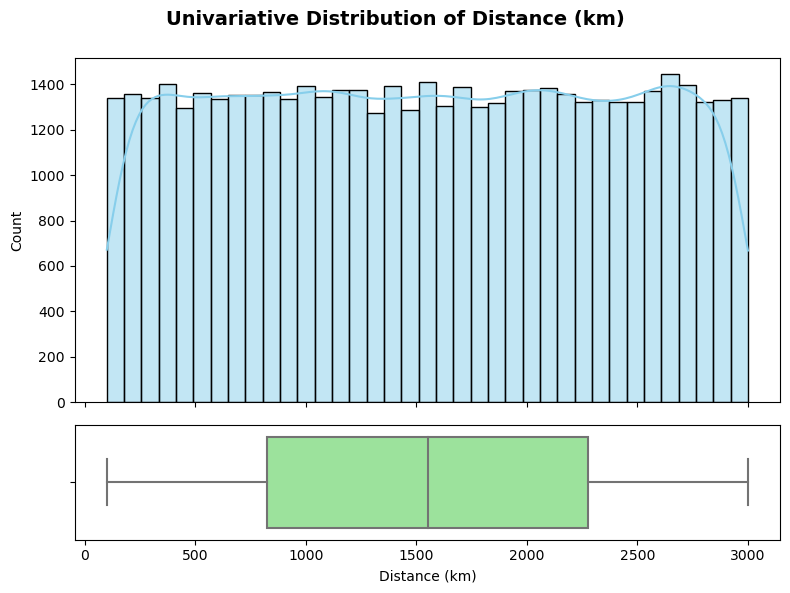

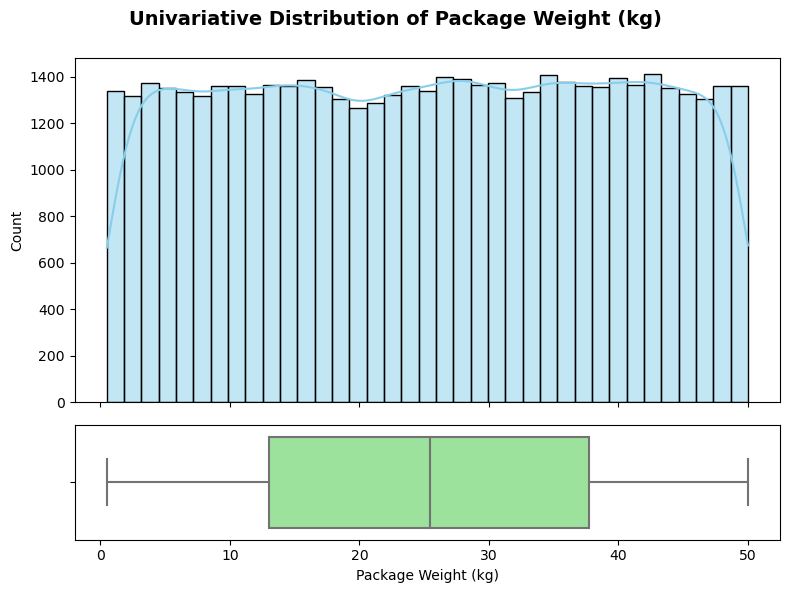

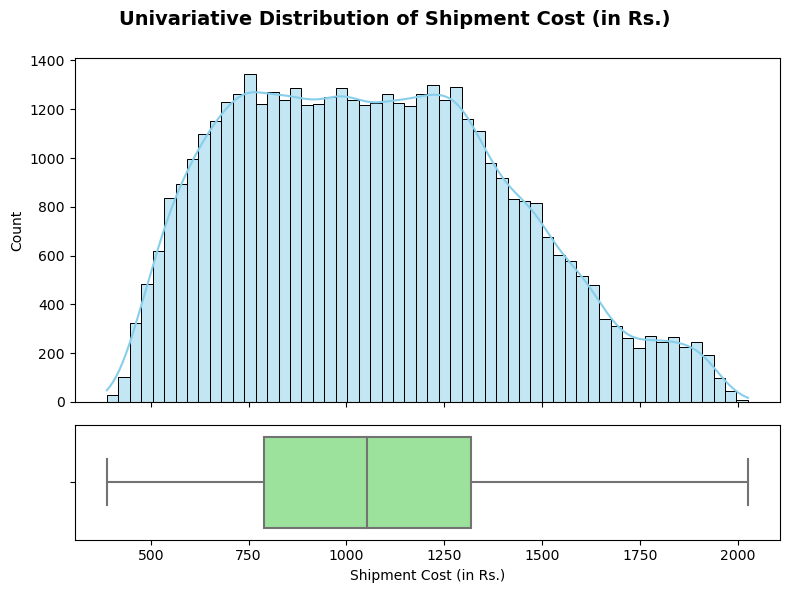

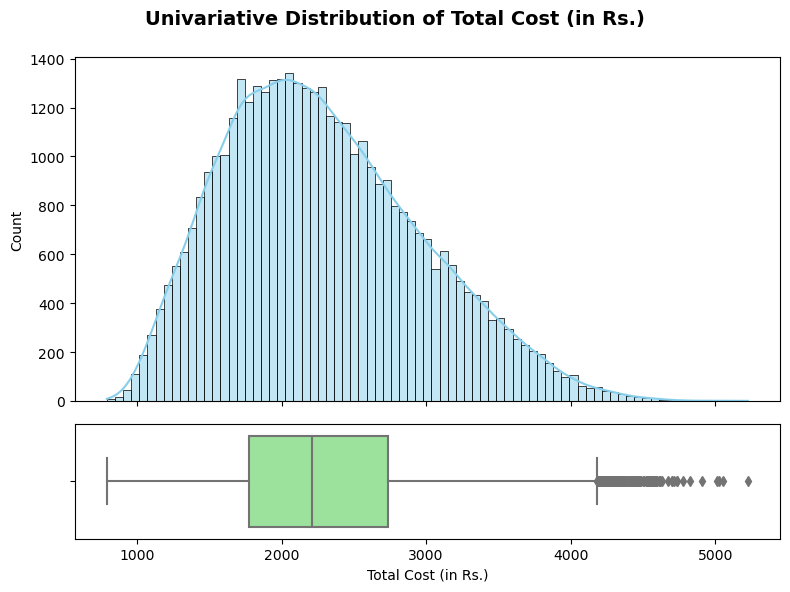

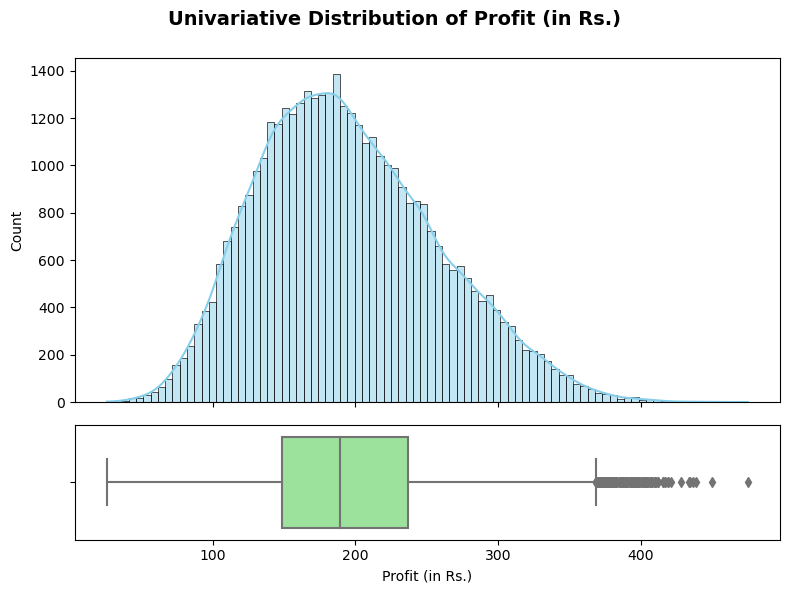

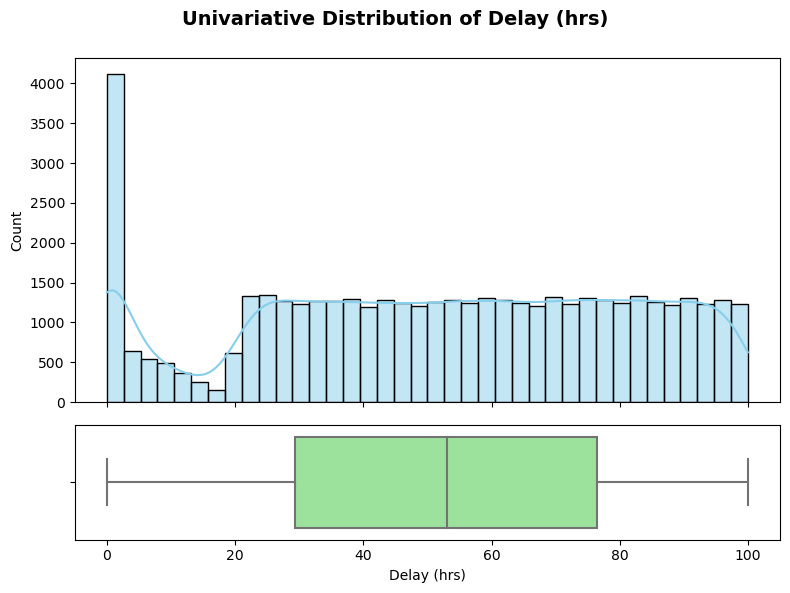

In [381]:
# Univariative Distribution of numeric variables
for col in key_numeric_vars:
    fig,ax = plt.subplots(2,1,figsize = (8,6),sharex= True, gridspec_kw={'height_ratios':[3,1]})
    sns.histplot(df[col].dropna(),ax= ax[0],kde =True, color = 'skyblue')
    sns.boxplot(x=df[col], ax=ax[1], color ='lightgreen')  
    fig.suptitle(f'Univariative Distribution of {col}',fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

### ii) Univariate Analysis for Categorical Variables

In [382]:
# Categorical variables analysis
categorical_cols = df.select_dtypes(include=['object','bool']).columns.tolist()
categorical_cols += [col for col in df.select_dtypes(include =['int64', 'float64']).columns 
                     if df[col].nunique() <= 10]

print(f"\nAnalyzing {len(categorical_cols)} categorical variables")
print("\nCategorical columns:\n", categorical_cols)


Analyzing 18 categorical variables

Categorical columns:
 ['Shipment ID', 'Company Name', 'Source Location', 'Destination Location', 'Category', 'Shipment Priority', 'Shipment Mode', 'Fragile', 'Status', 'Payment Method', 'Shipment Month', 'Shipment Day of Week', 'Shipment Weekend', 'Source Latitude', 'Source Longitude', 'Destination Latitude', 'Destination Longitude', 'Customer Rating']


In [383]:
# Display value counts for key categorical variables
key_cat_vars = ['Company Name', 'Shipment Mode', 'Shipment Priority', 'Status', 'Fragile']

for col in key_cat_vars:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
    
    print(f"\nPercentage distribution for {col}:")
    print(df[col].value_counts(normalize=True).map(lambda x: f"{x:.2%}"))


Value counts for Company Name:
Company Name
FedEx        12548
DHL          10034
UPS          10016
Delhivery     9945
BlueDart      7457
Name: count, dtype: int64

Percentage distribution for Company Name:
Company Name
FedEx        25.10%
DHL          20.07%
UPS          20.03%
Delhivery    19.89%
BlueDart     14.91%
Name: proportion, dtype: object

Value counts for Shipment Mode:
Shipment Mode
Road    24851
Rail    10130
Air     10003
Sea      5016
Name: count, dtype: int64

Percentage distribution for Shipment Mode:
Shipment Mode
Road    49.70%
Rail    20.26%
Air     20.01%
Sea     10.03%
Name: proportion, dtype: object

Value counts for Shipment Priority:
Shipment Priority
Normal      29946
Express     15205
Same-day     4849
Name: count, dtype: int64

Percentage distribution for Shipment Priority:
Shipment Priority
Normal      59.89%
Express     30.41%
Same-day     9.70%
Name: proportion, dtype: object

Value counts for Status:
Status
In-Transit    12573
Delivered     12543
Dela

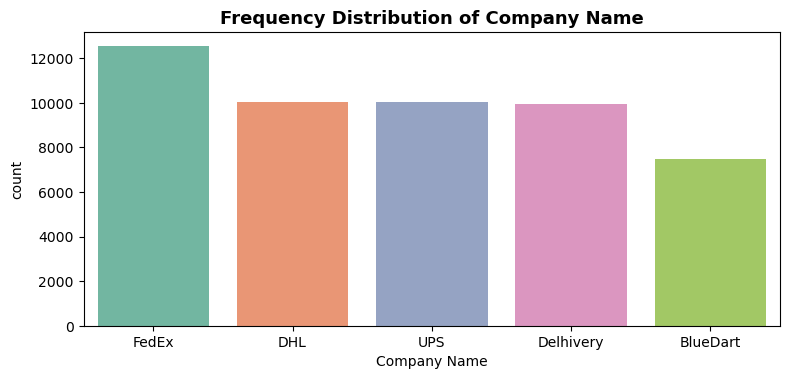

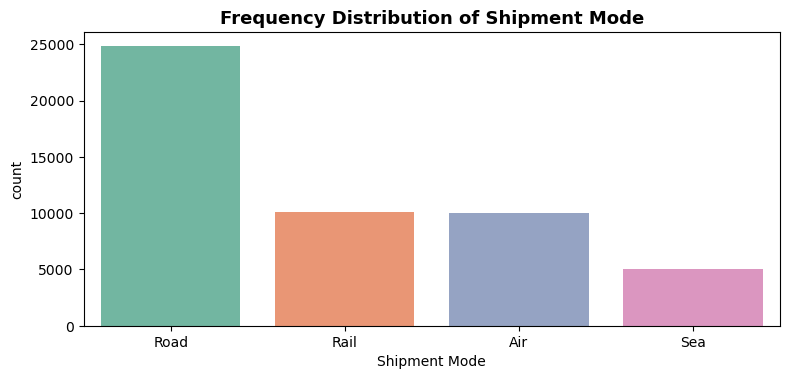

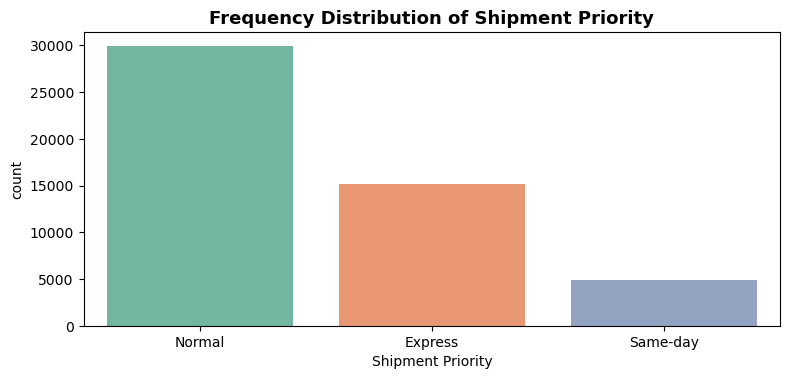

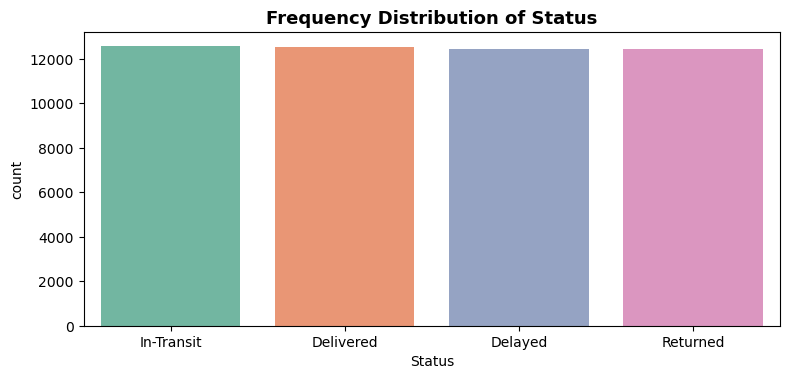

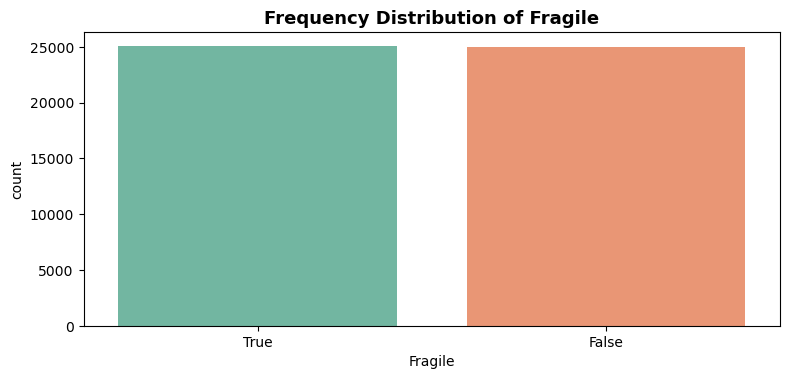

In [384]:
# Visualiztions of countplots for key categorical variables
for col in key_cat_vars:
    fig,ax = plt.subplots(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2', ax=ax)
    plt.title(f'Frequency Distribution of {col}',fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.subplots_adjust(top = 0.88)
    plt.show()

## C. Bivariate & Multivariate Analysis

### i) Numerical vs Numerical

In [385]:
# Correlation Analysis for numerical variables

corr_matrix = df[numerical_cols].corr().abs()
threshold = 0.5
strong_pairs = [(i,j) for i in numerical_cols for j in numerical_cols 
                if i!=j and corr_matrix.loc[i,j] >= threshold and i<j]

# Strongly Correlated  Numerical Pairs
strong_pairs

[('Distance (km)', 'Expected Delivery Time (hrs)'),
 ('Package Cost (in Rs.)', 'Total Cost (in Rs.)'),
 ('Package Cost (in Rs.)', 'Profit (in Rs.)'),
 ('Shipment Cost (in Rs.)', 'Total Cost (in Rs.)'),
 ('Profit (in Rs.)', 'Total Cost (in Rs.)'),
 ('Actual Delivery Time (hrs)', 'Shipping Duration')]

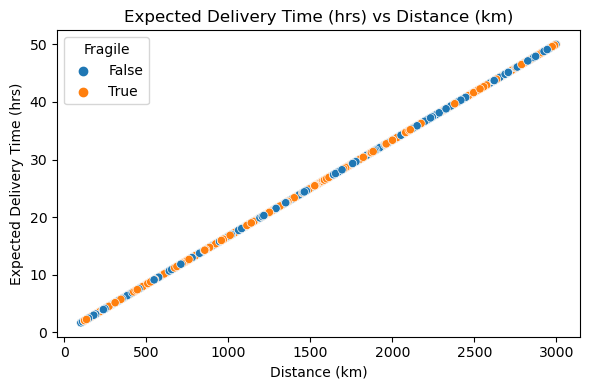

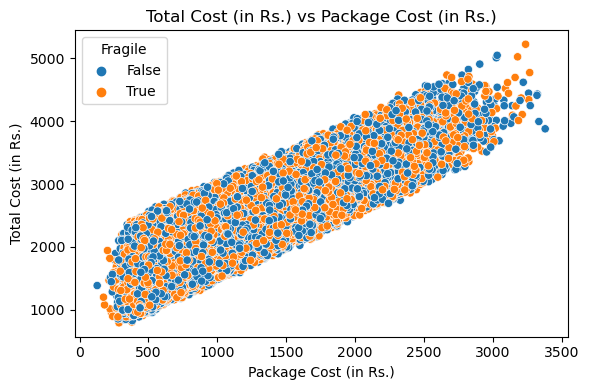

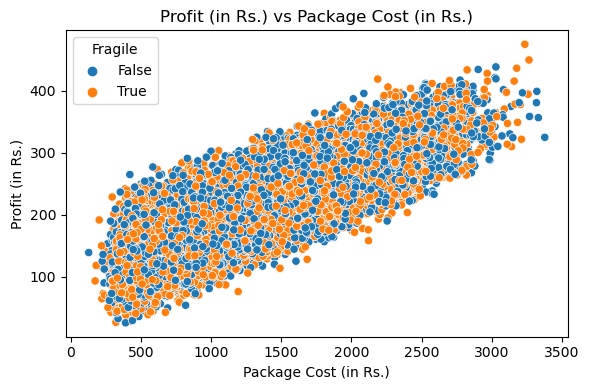

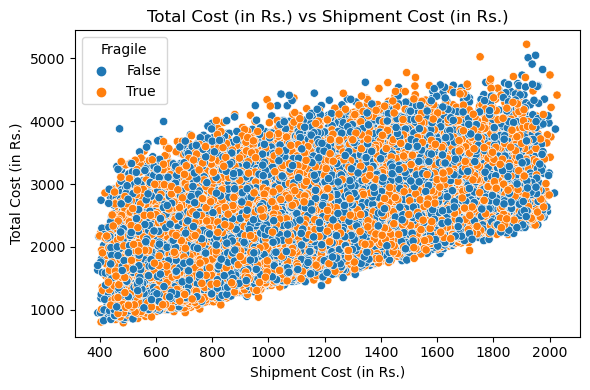

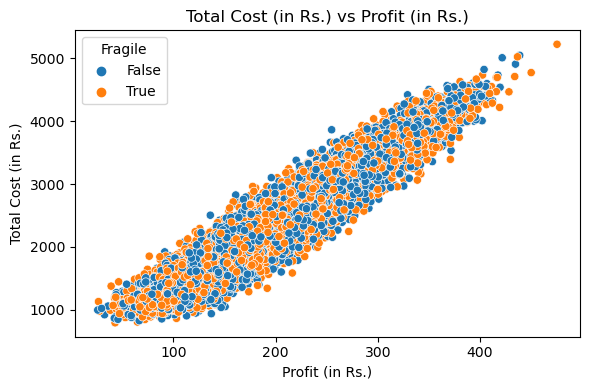

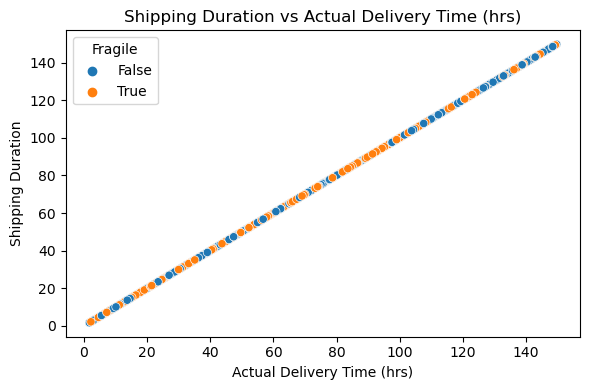

In [386]:
# Scatter plot of Strongly Correlated  Numerical Pairs
for x, y in strong_pairs:
    plt.figure(figsize= (6,4))
    sns.scatterplot(data = df, x=x, y=y,hue= df.select_dtypes(include ='bool').iloc[:,0])
    plt.title(f'{y} vs {x}')
    plt.tight_layout()
    plt.show()

In [387]:
# Top correlations
correlations = correlation_matrix.stack()
correlations = correlations[correlations < 1.0]  # Remove self-correlations
strong_correlations = correlations.abs().sort_values(ascending=False).head(10)
strong_correlations

Expected Delivery Time (hrs)  Distance (km)                   1.000000
Distance (km)                 Expected Delivery Time (hrs)    1.000000
Profit (in Rs.)               Total Cost (in Rs.)             0.947380
Total Cost (in Rs.)           Profit (in Rs.)                 0.947380
Package Cost (in Rs.)         Total Cost (in Rs.)             0.859424
Total Cost (in Rs.)           Package Cost (in Rs.)           0.859424
Package Cost (in Rs.)         Profit (in Rs.)                 0.816137
Profit (in Rs.)               Package Cost (in Rs.)           0.816137
Shipment Cost (in Rs.)        Total Cost (in Rs.)             0.510811
Total Cost (in Rs.)           Shipment Cost (in Rs.)          0.510811
dtype: float64

### ii) Categorical vs. Numerical

In [388]:
# categorical columns (with low Cardinality)
cat_max_unique =10
cat_cols = [col for col in categorical_cols if df[col].nunique()<cat_max_unique]
cat_cols

['Company Name',
 'Category',
 'Shipment Priority',
 'Shipment Mode',
 'Fragile',
 'Status',
 'Payment Method',
 'Shipment Day of Week',
 'Shipment Weekend',
 'Customer Rating']

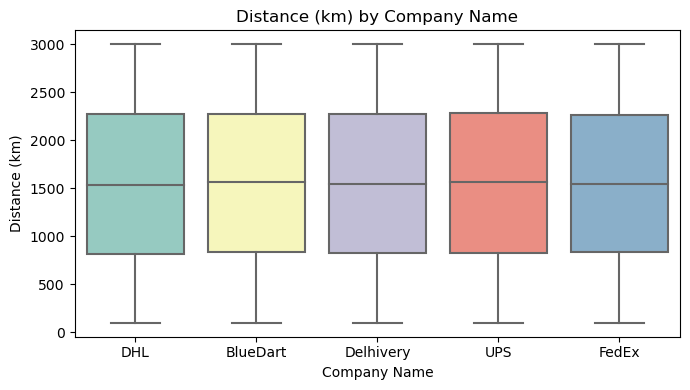

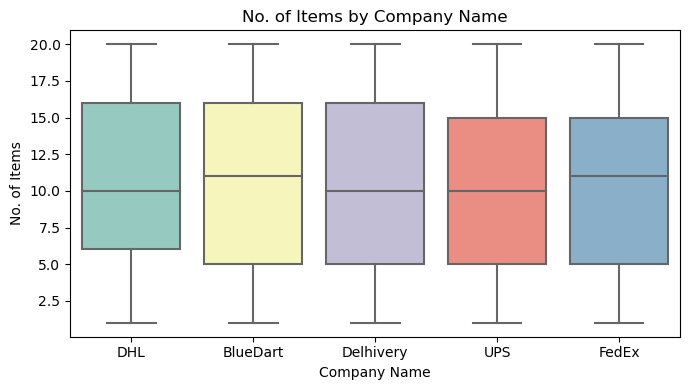

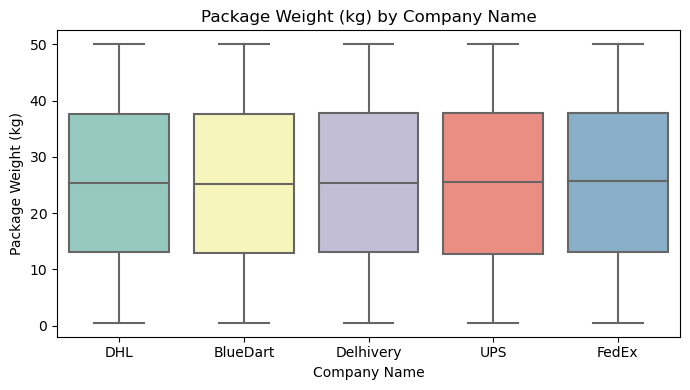

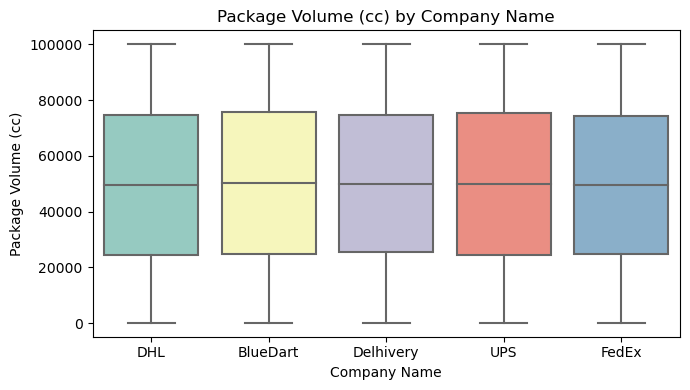

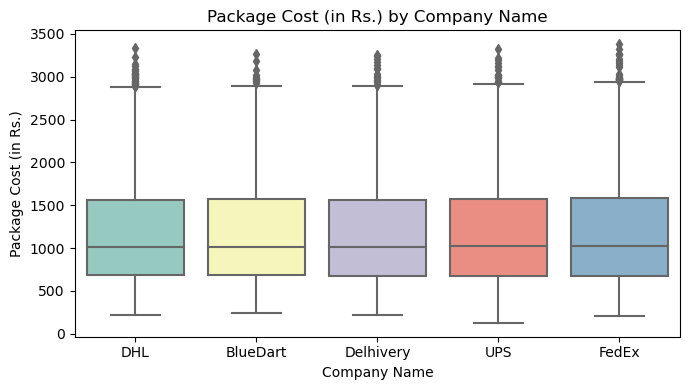

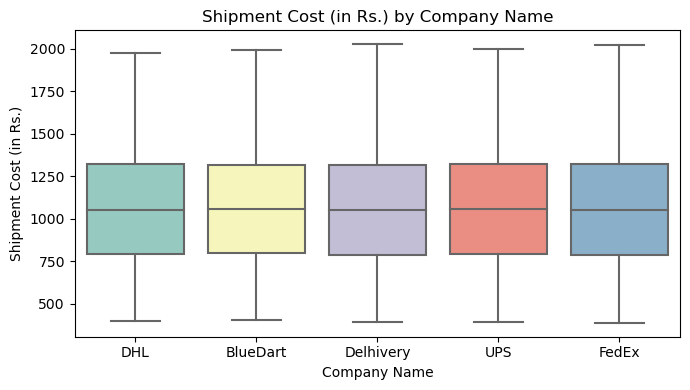

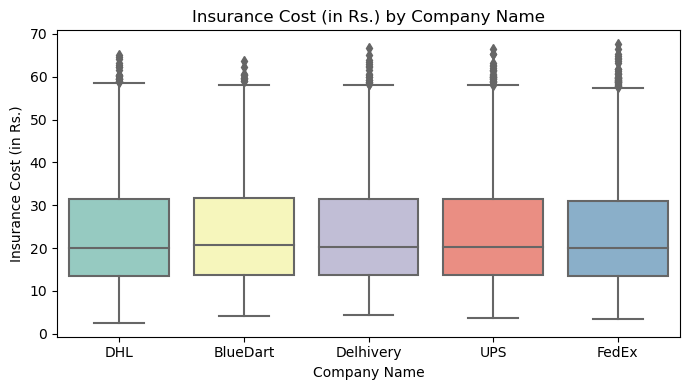

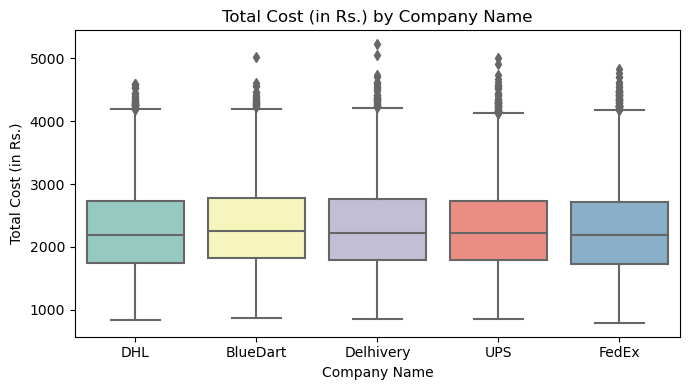

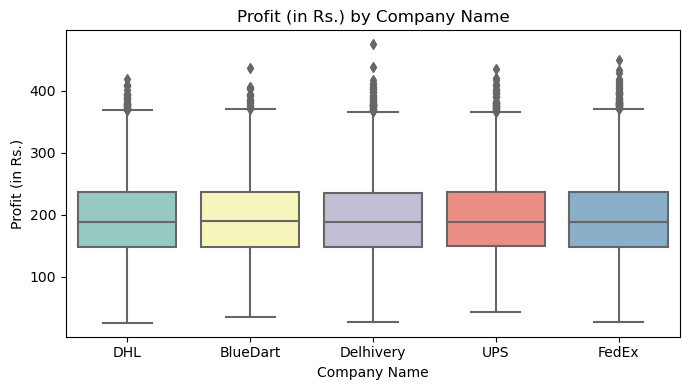

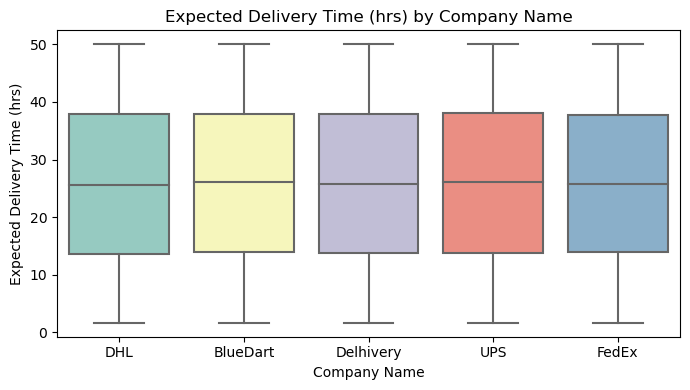

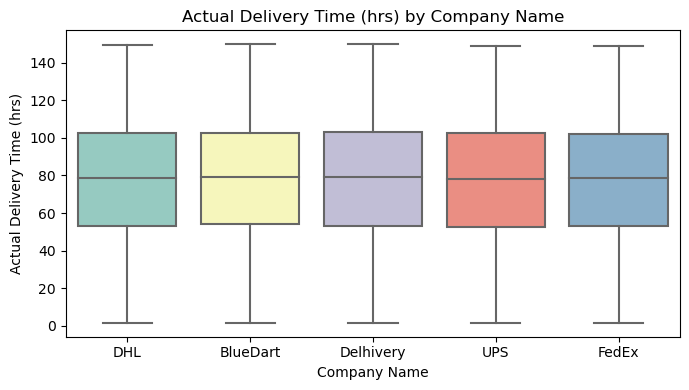

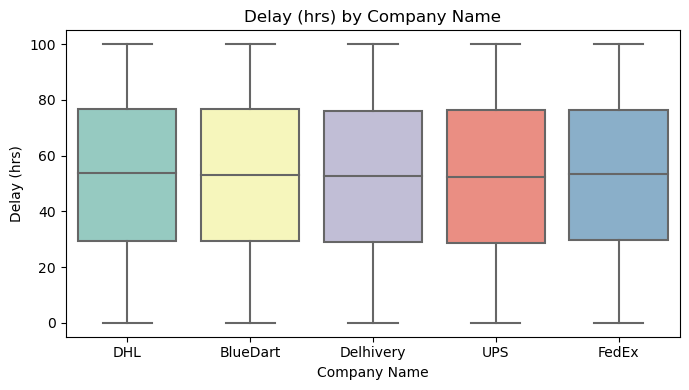

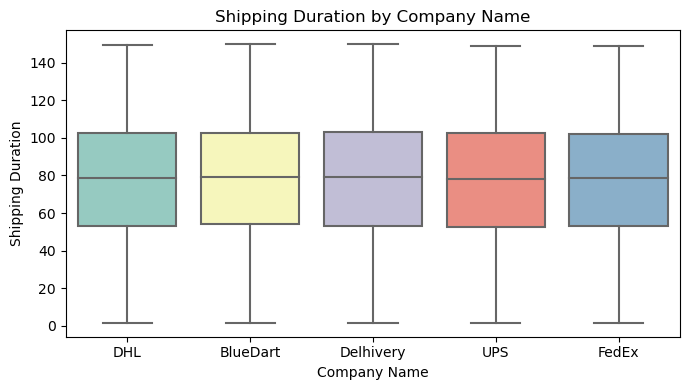

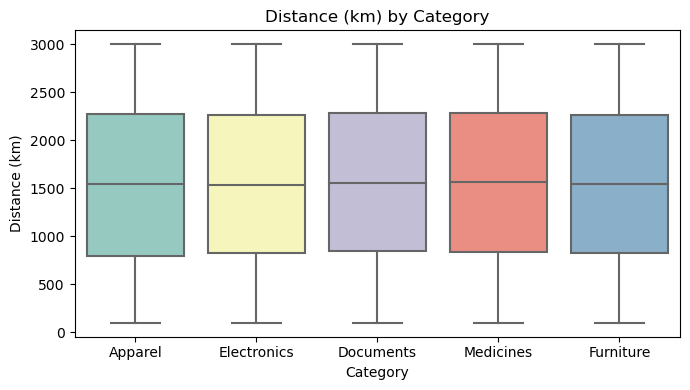

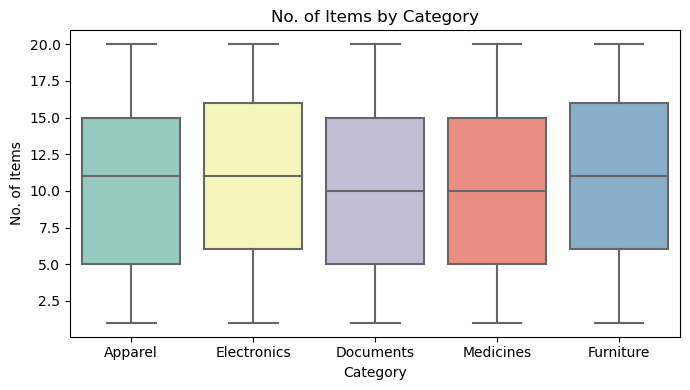

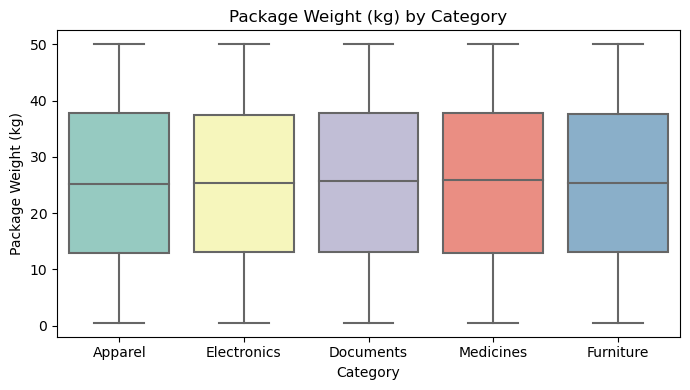

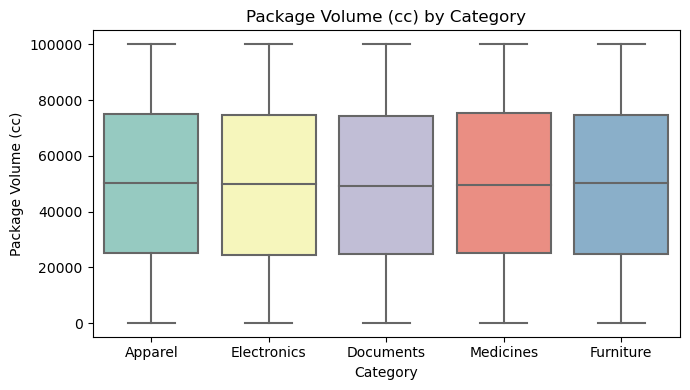

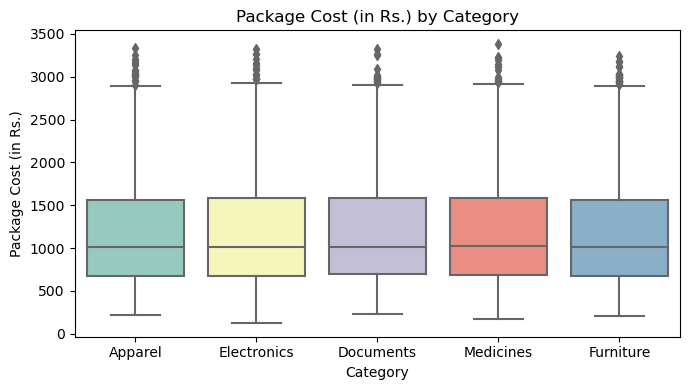

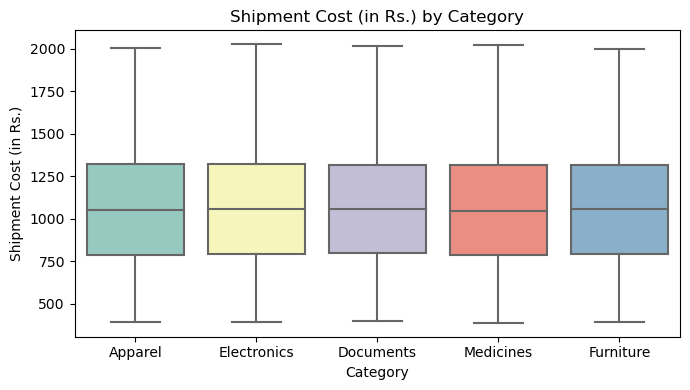

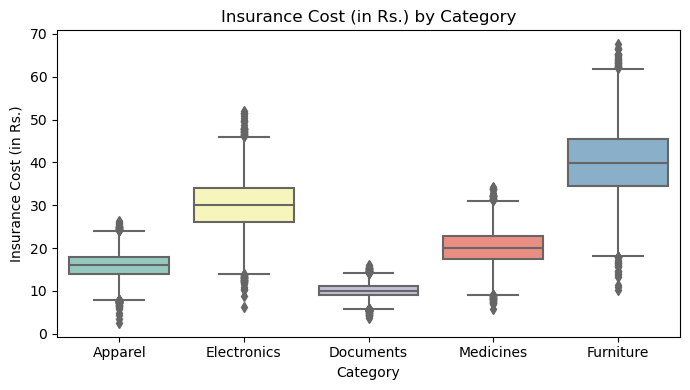

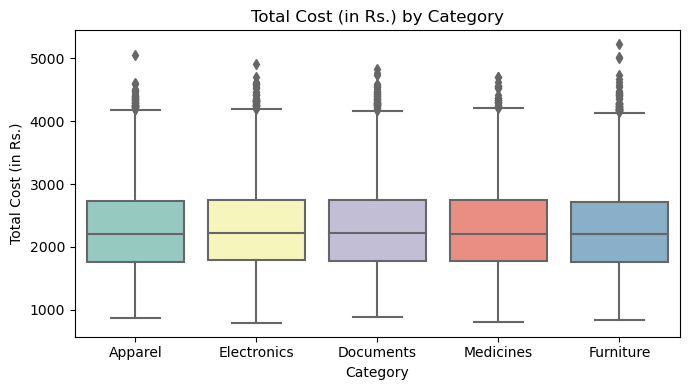

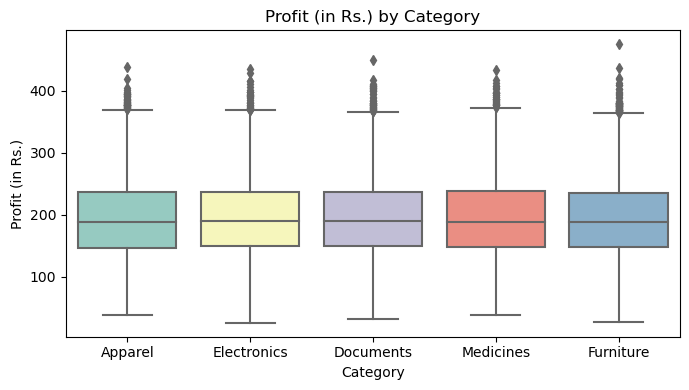

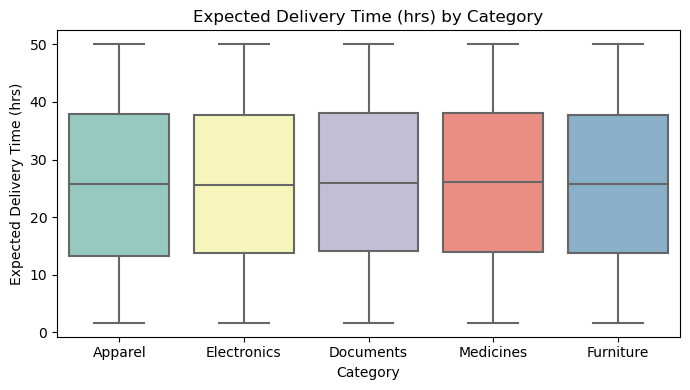

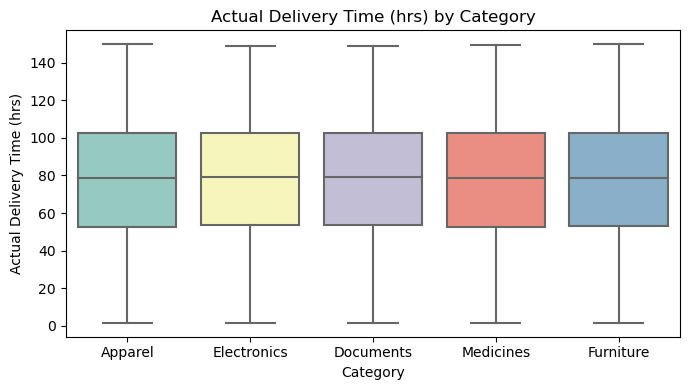

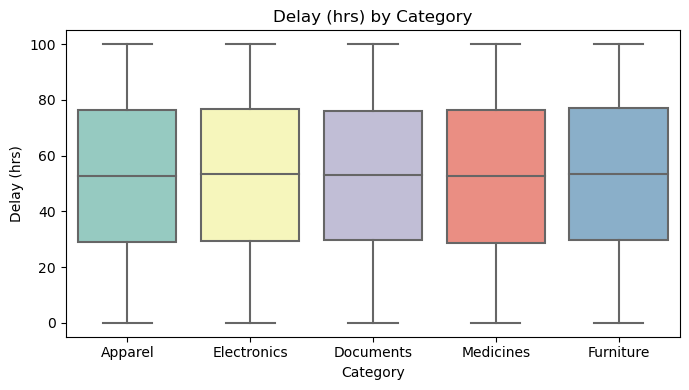

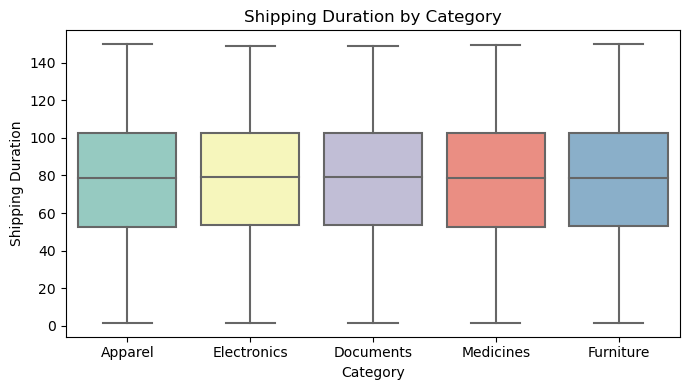

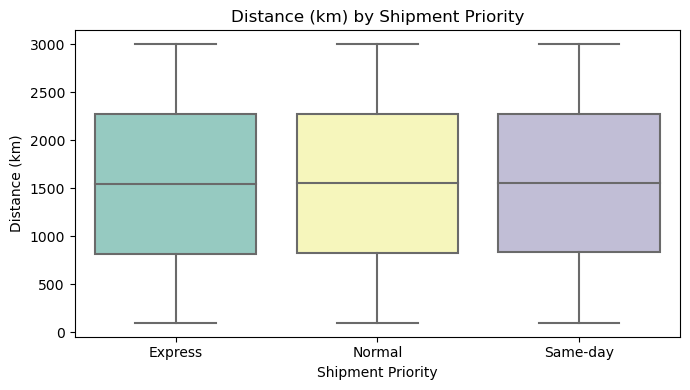

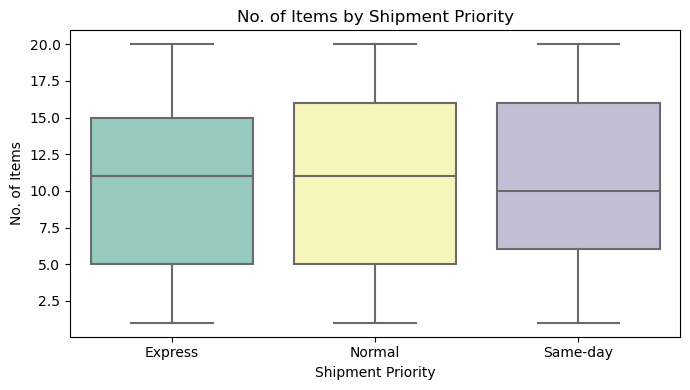

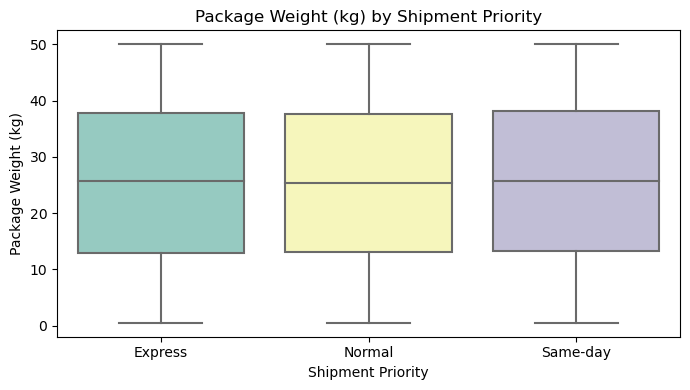

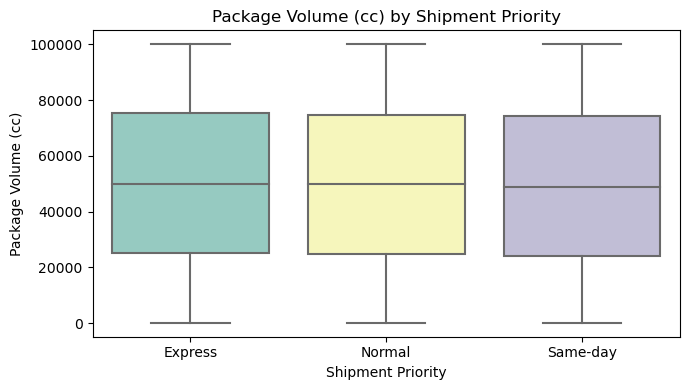

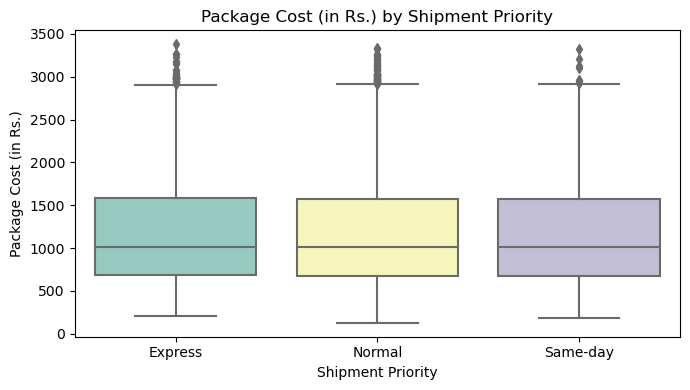

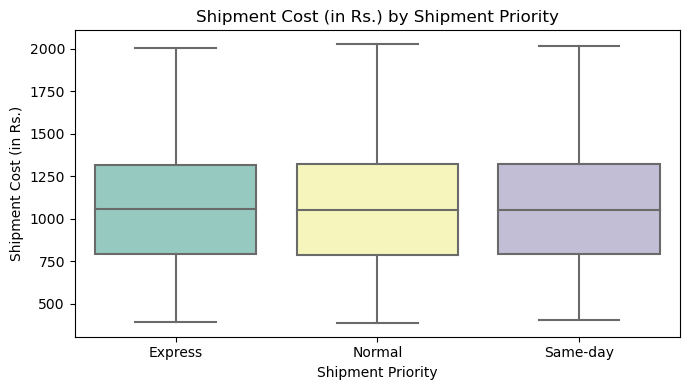

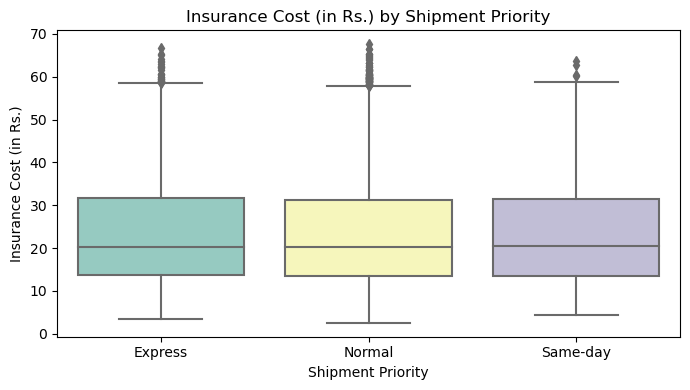

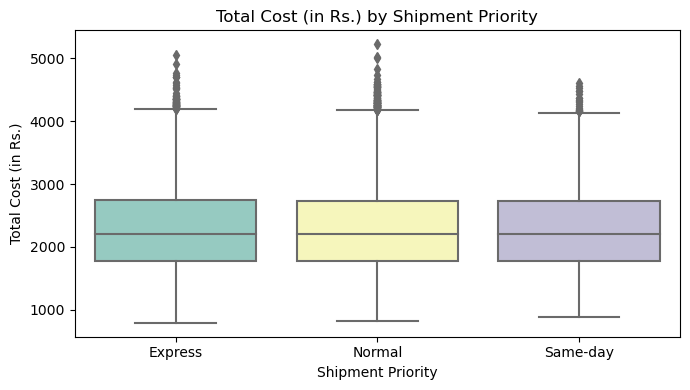

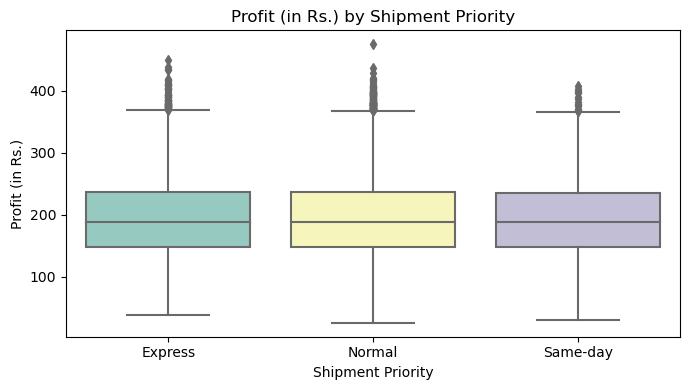

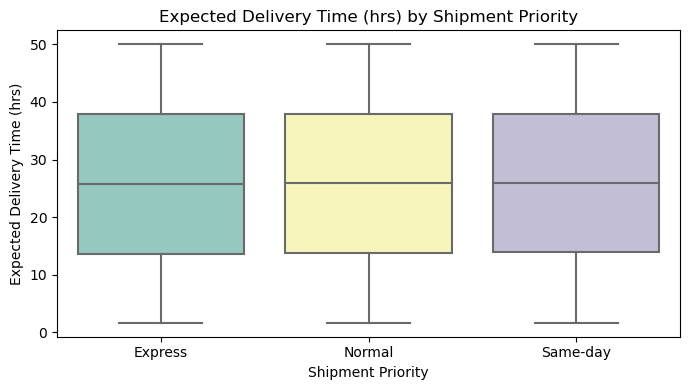

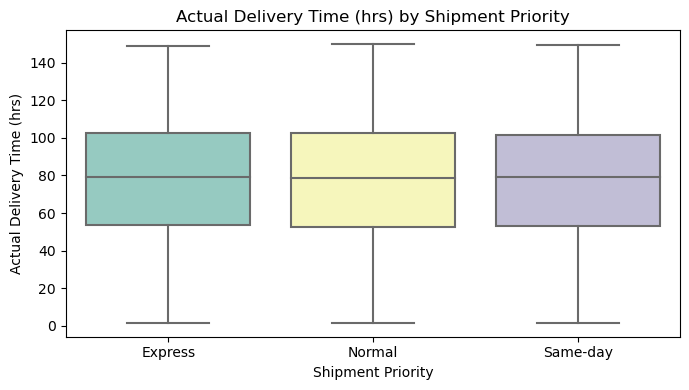

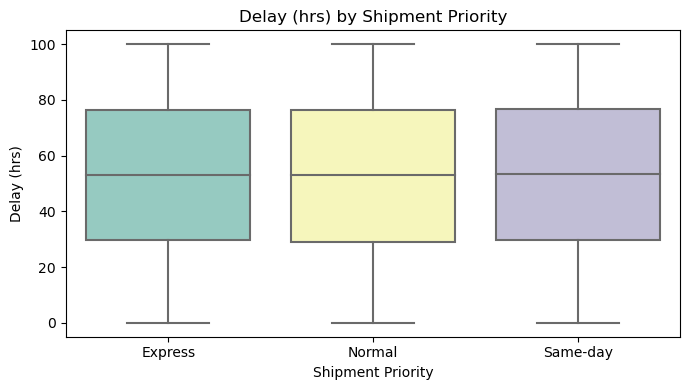

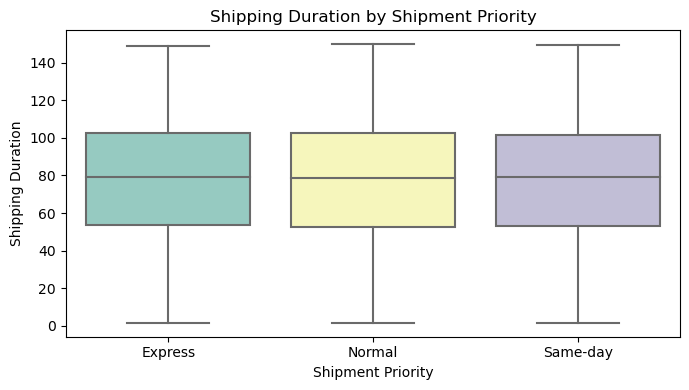

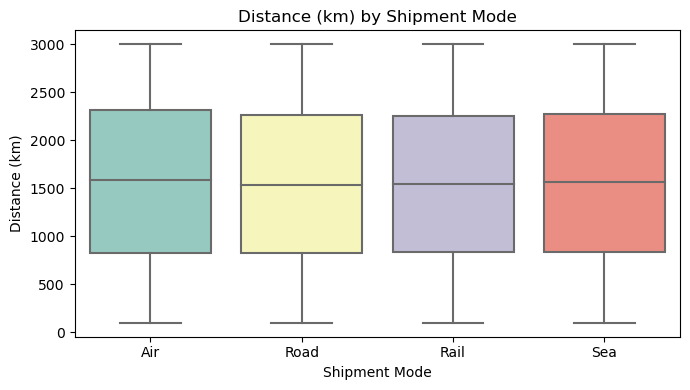

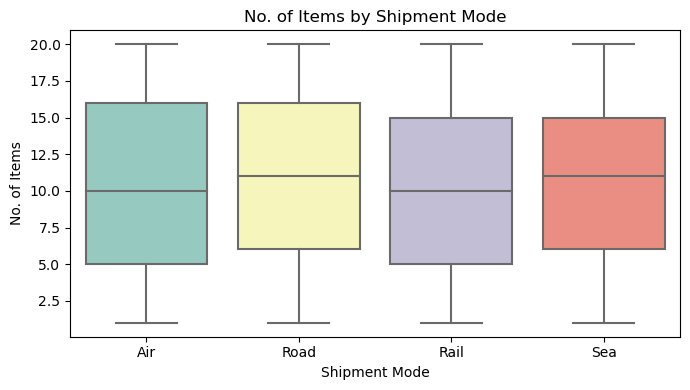

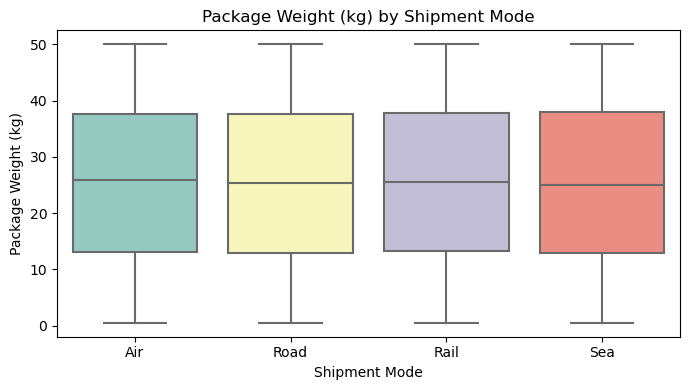

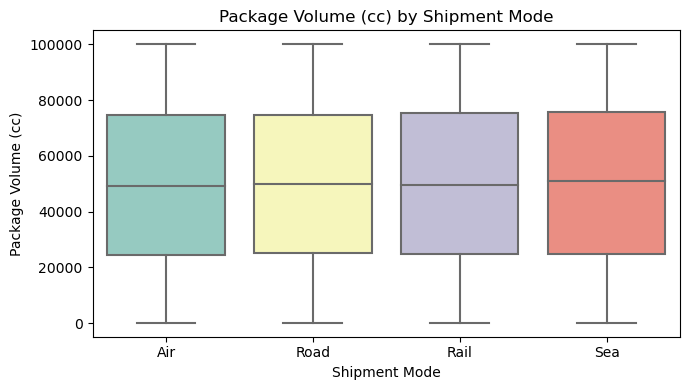

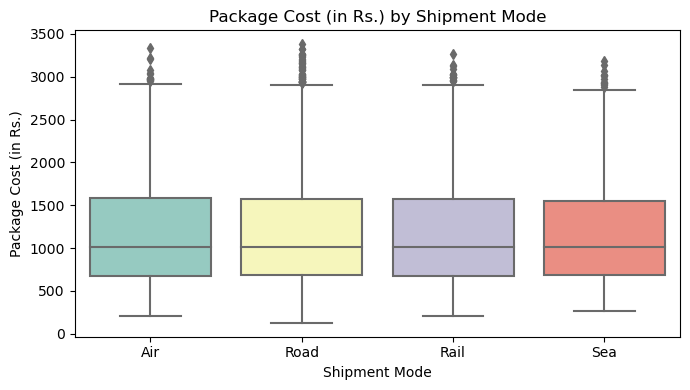

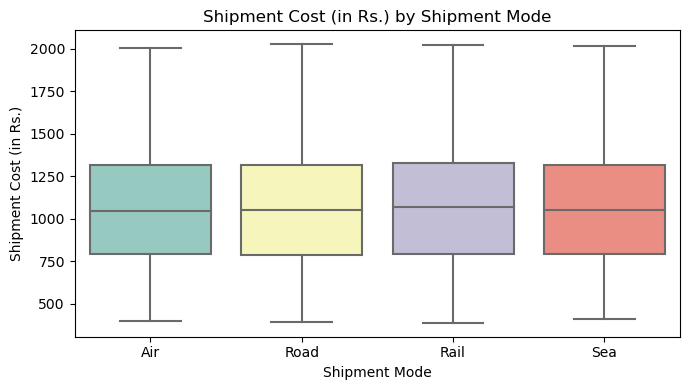

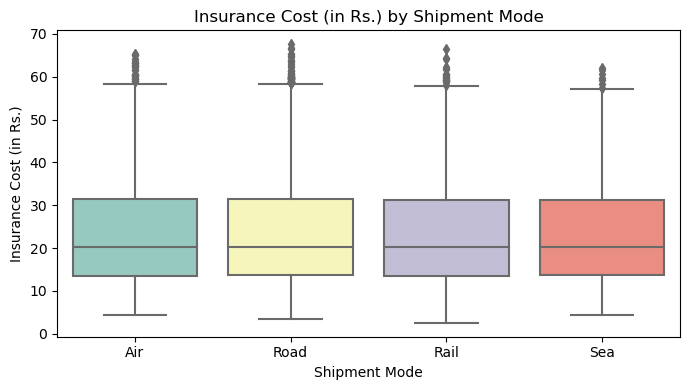

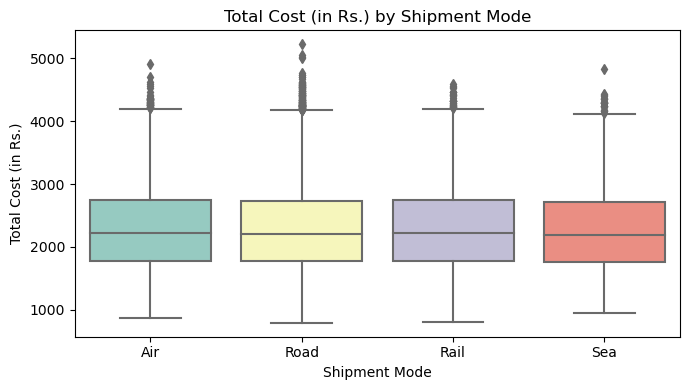

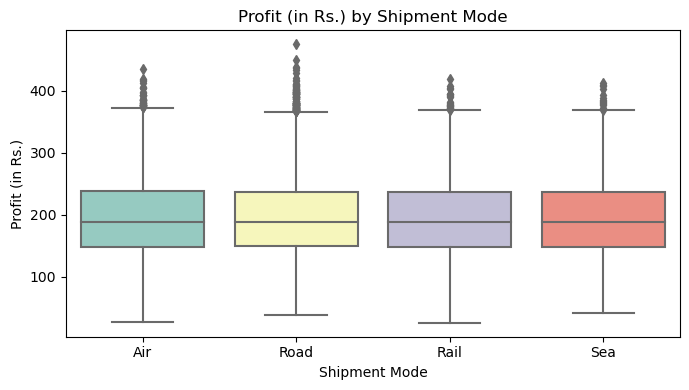

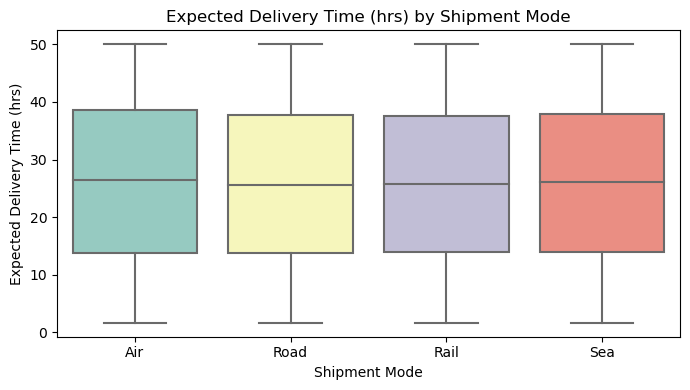

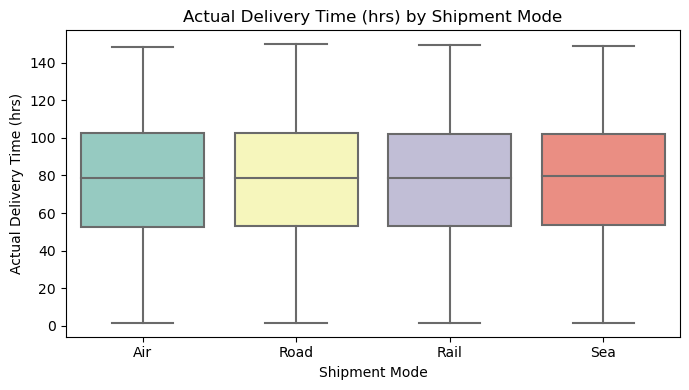

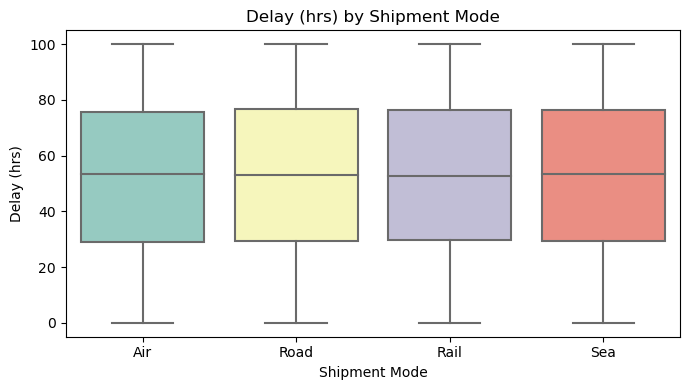

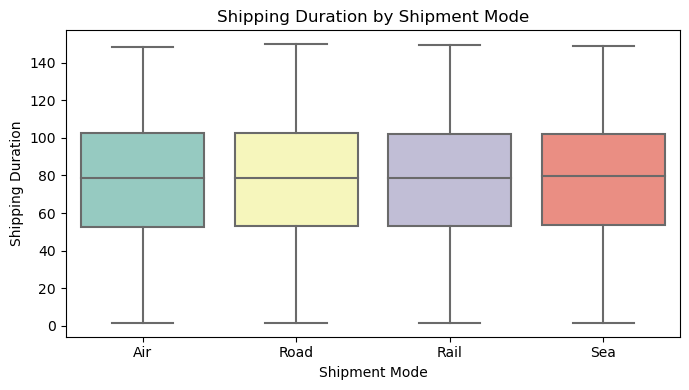

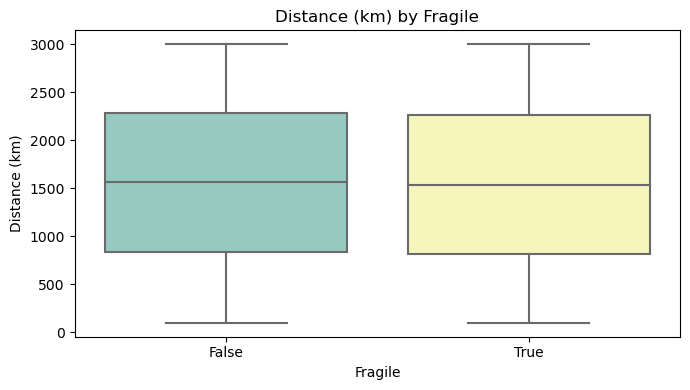

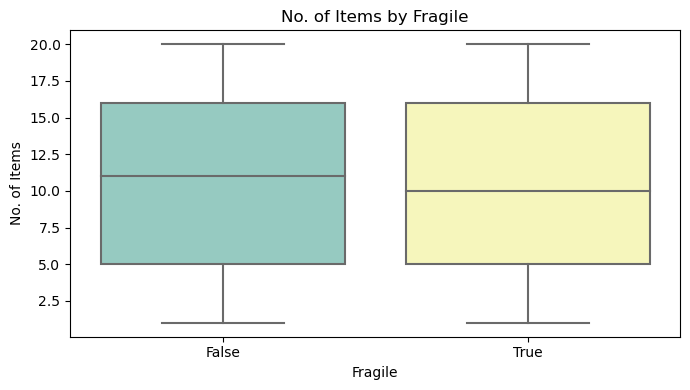

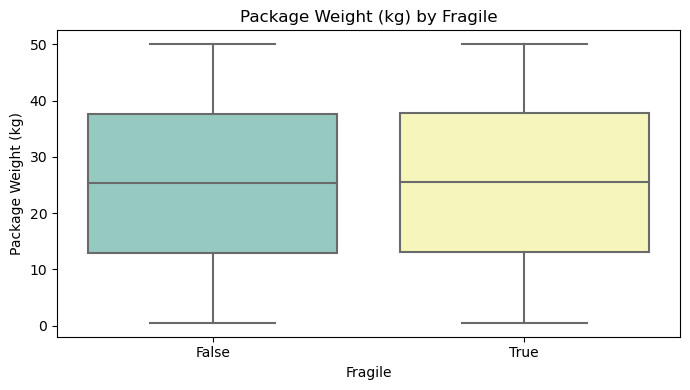

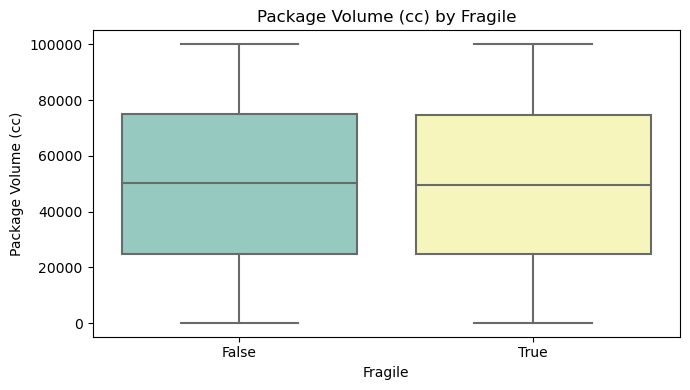

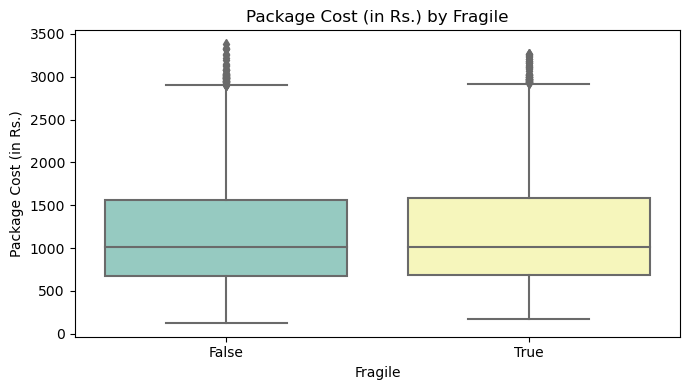

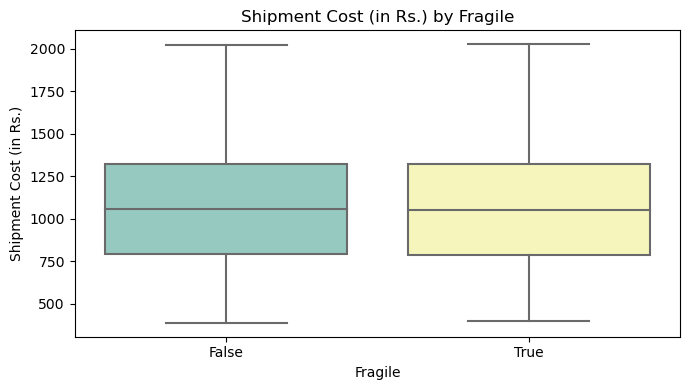

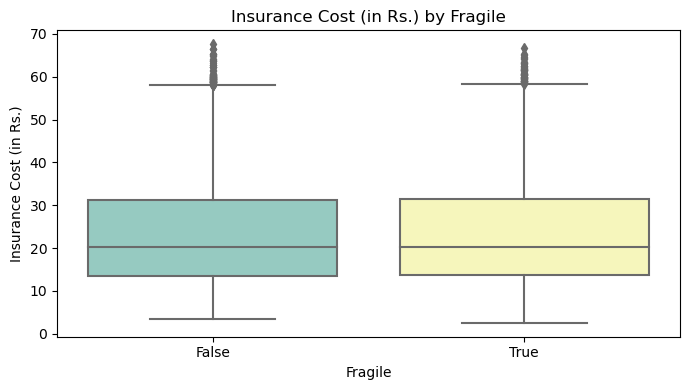

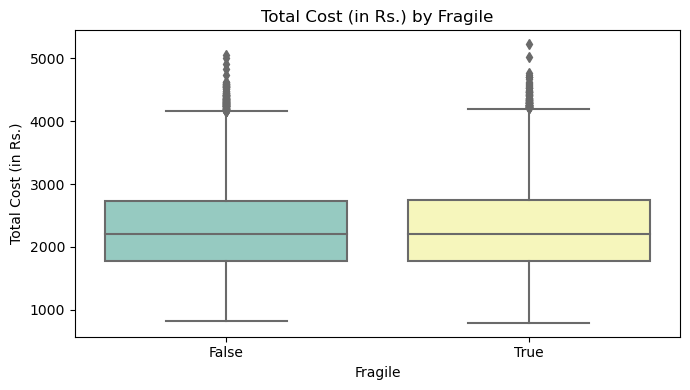

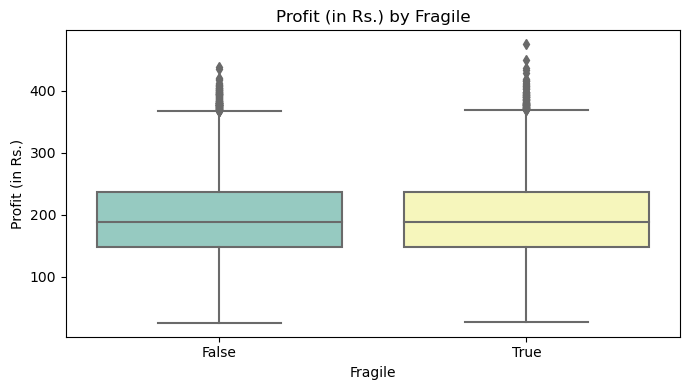

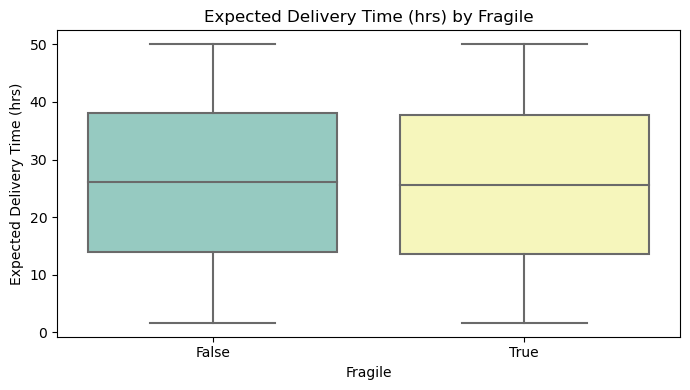

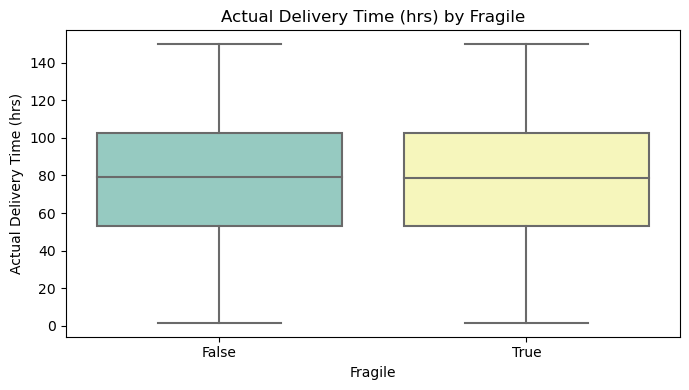

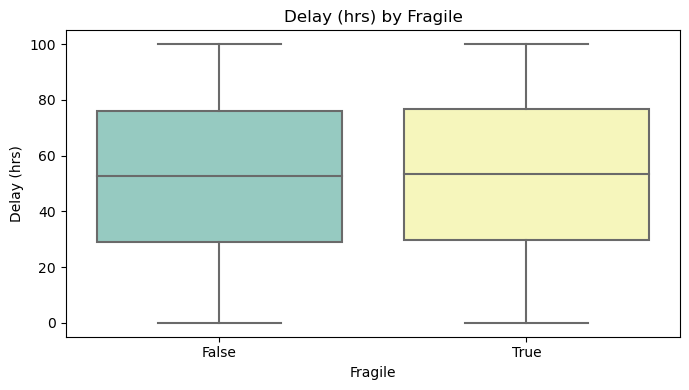

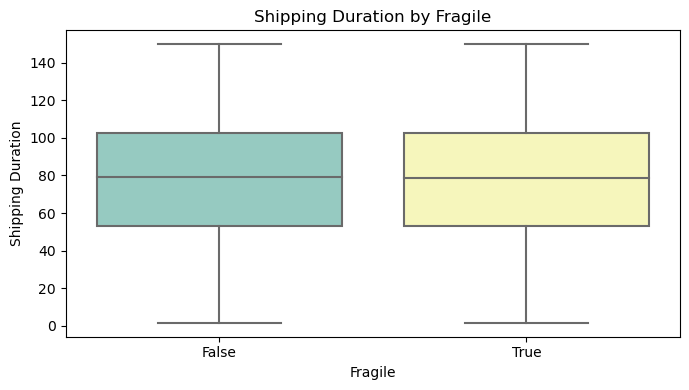

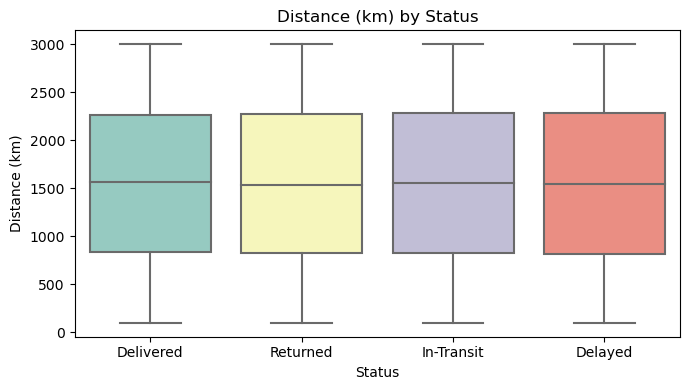

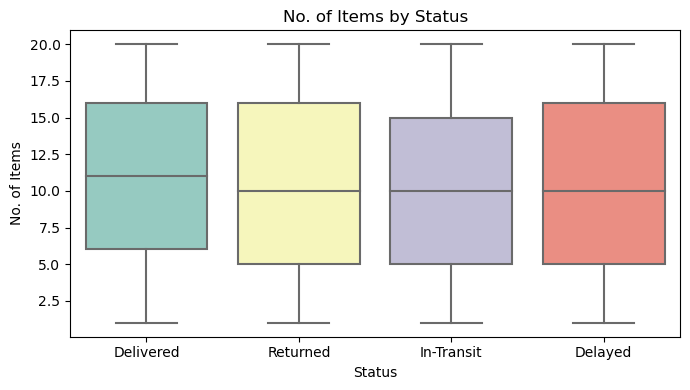

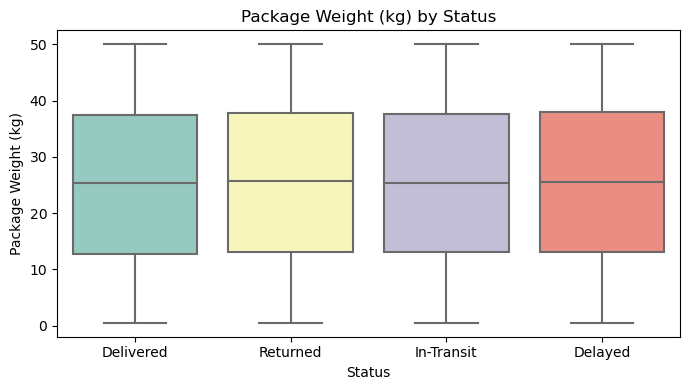

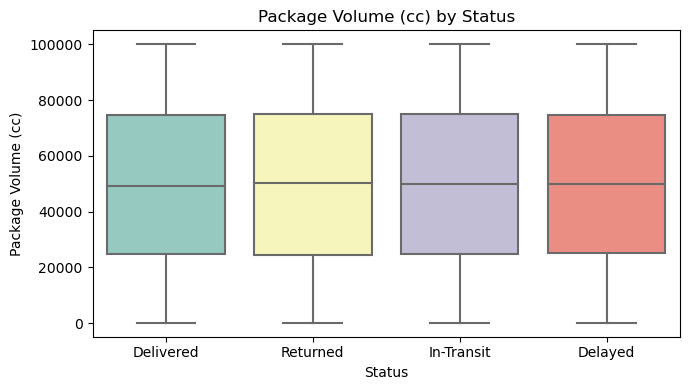

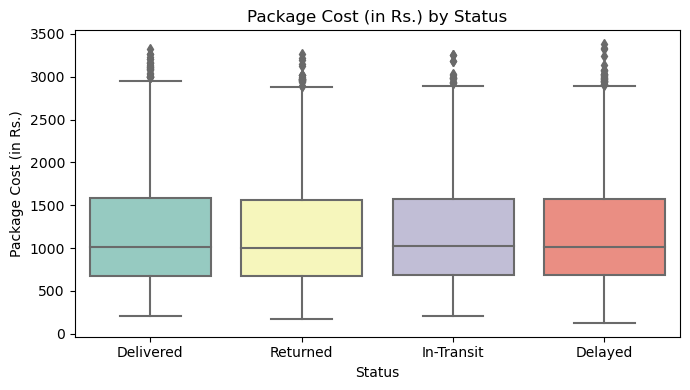

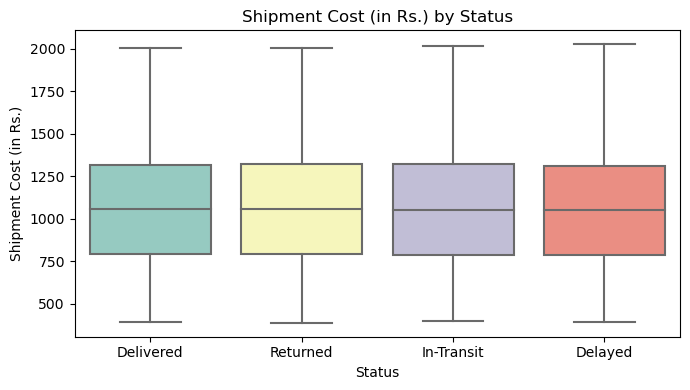

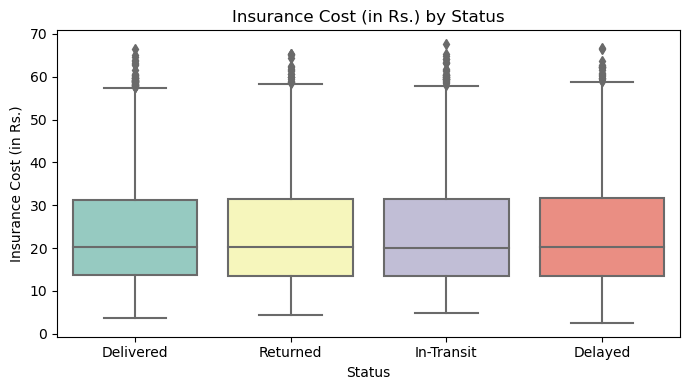

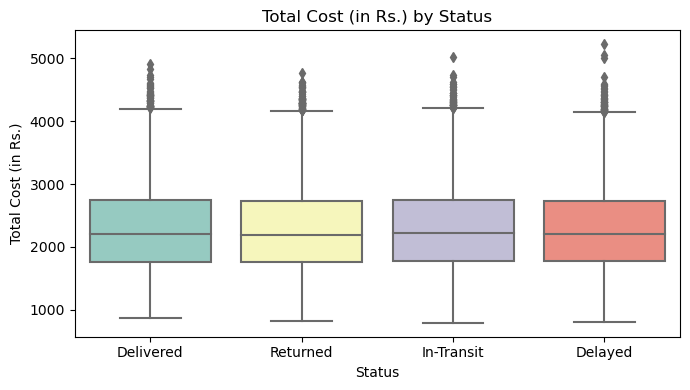

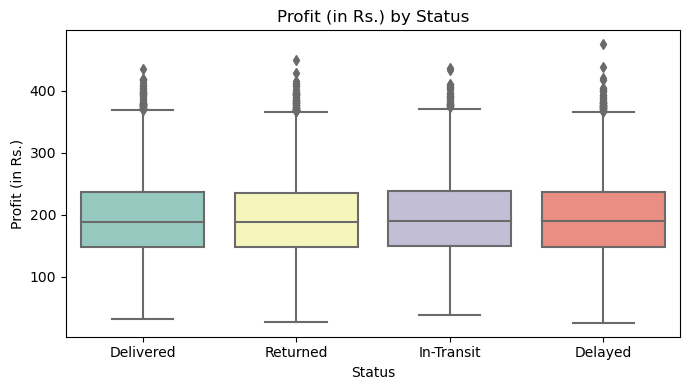

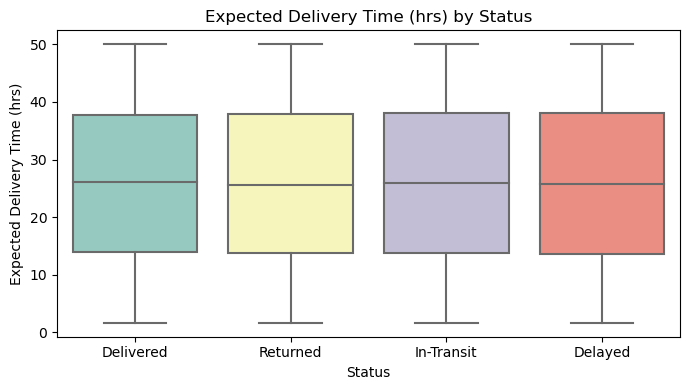

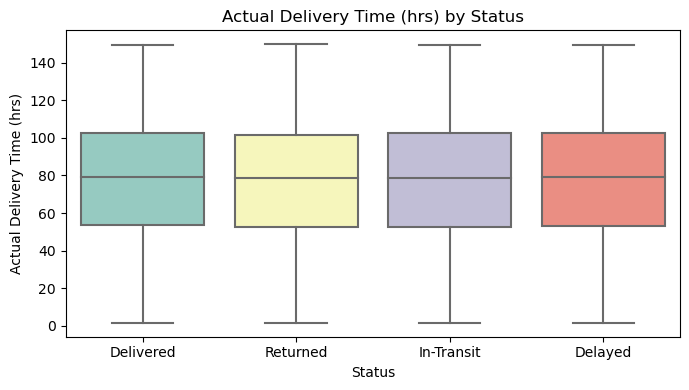

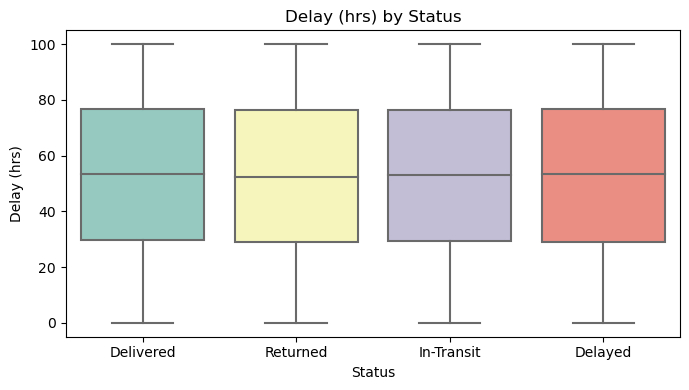

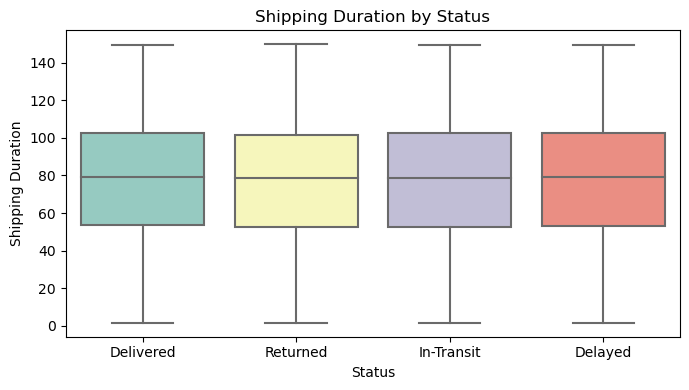

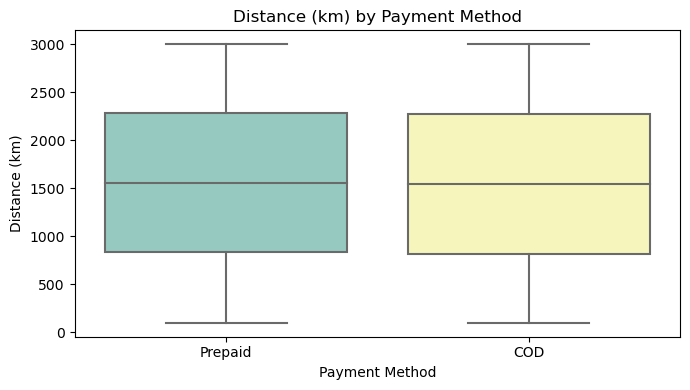

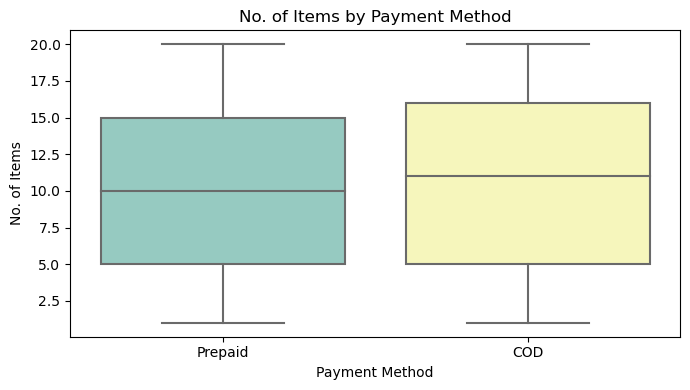

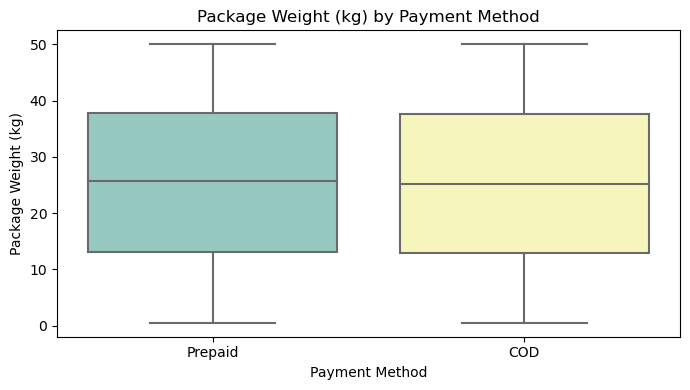

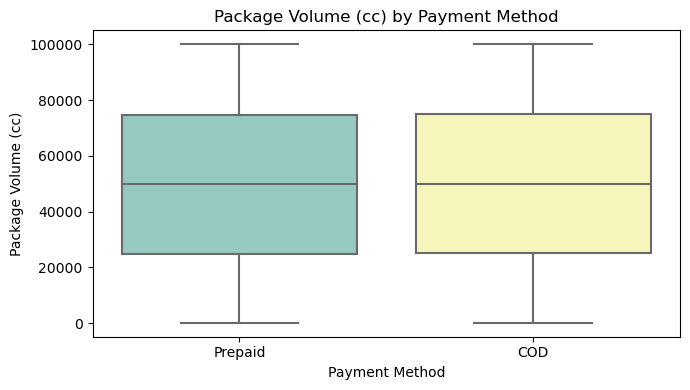

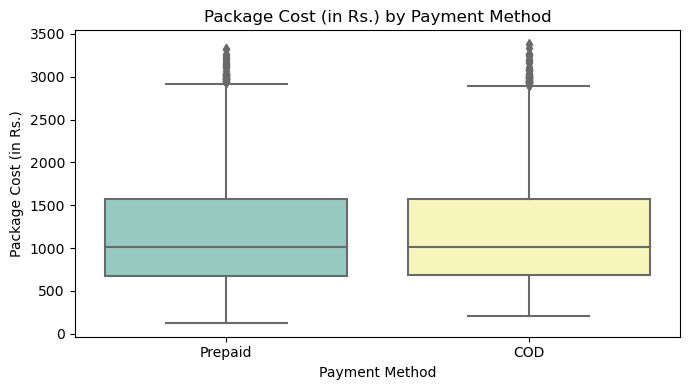

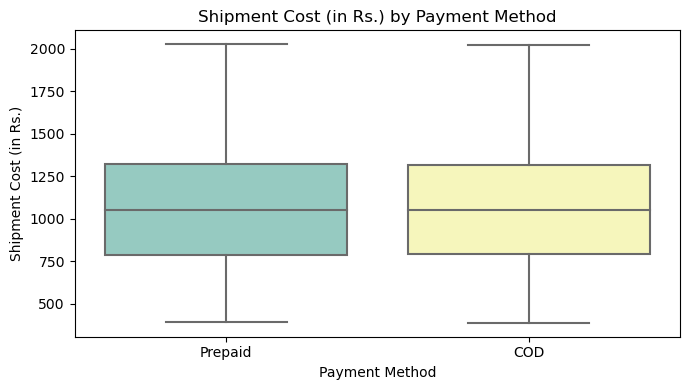

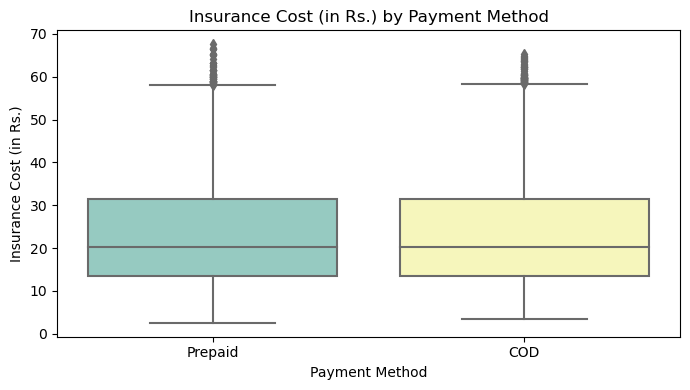

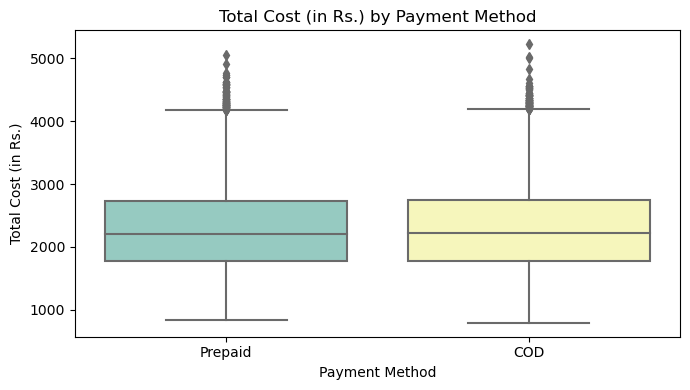

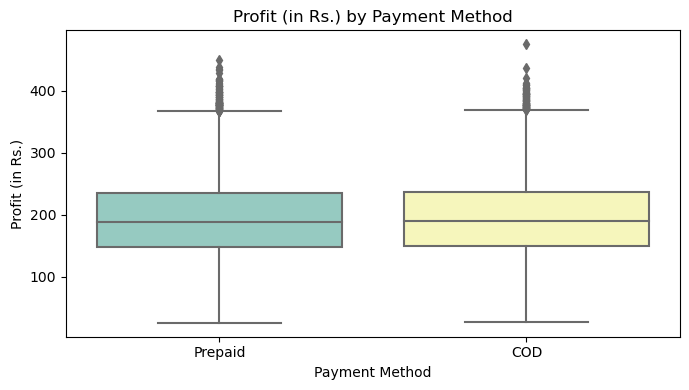

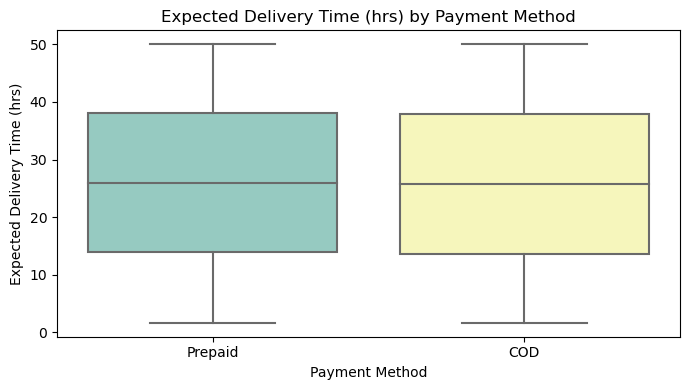

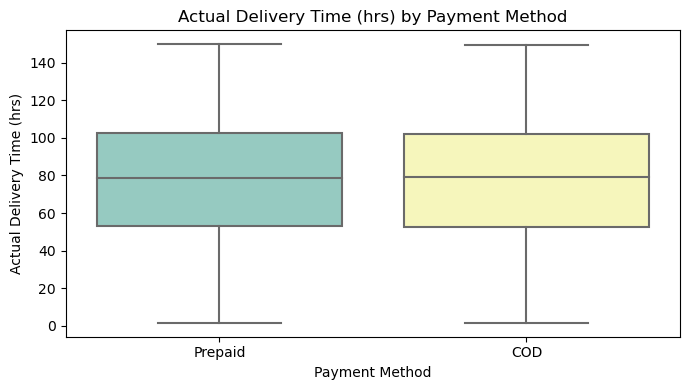

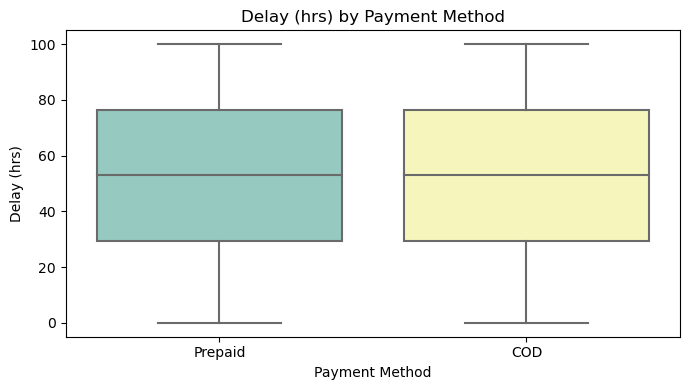

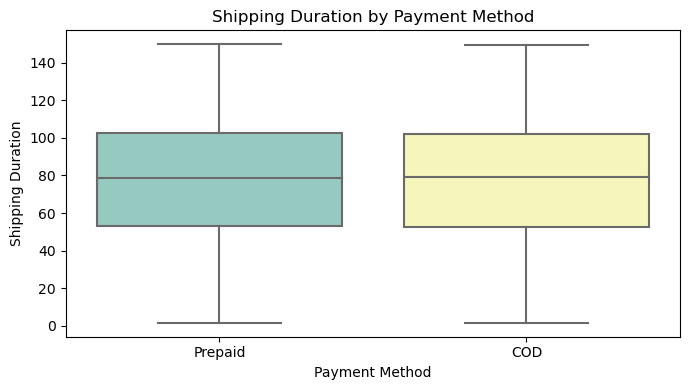

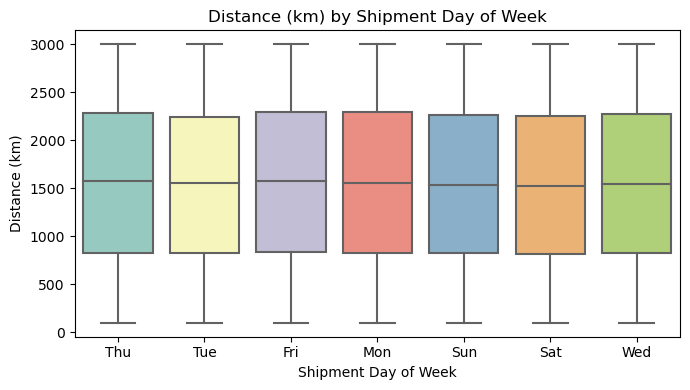

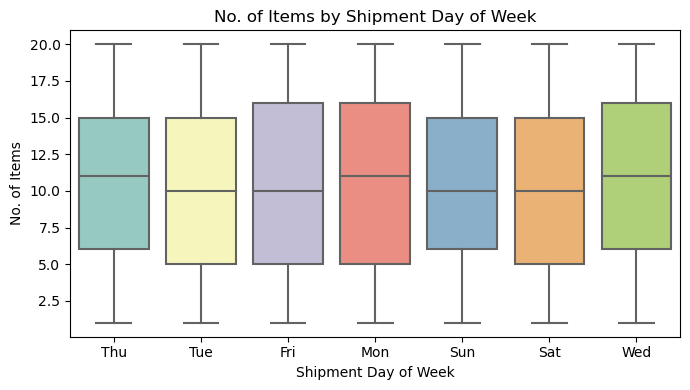

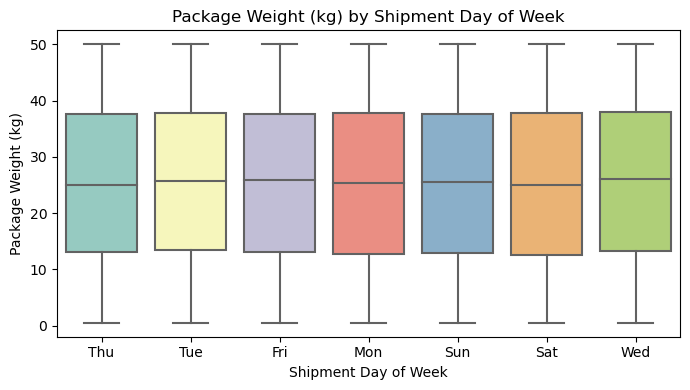

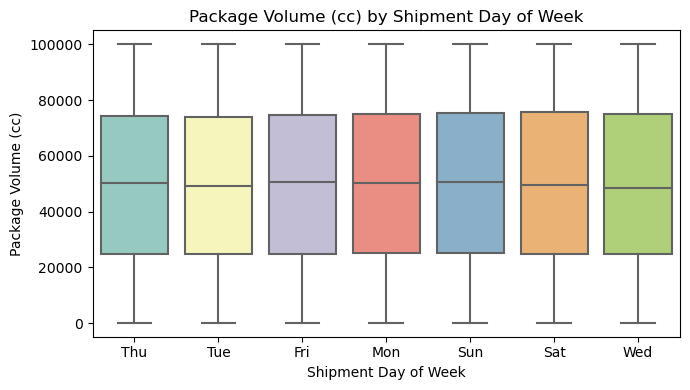

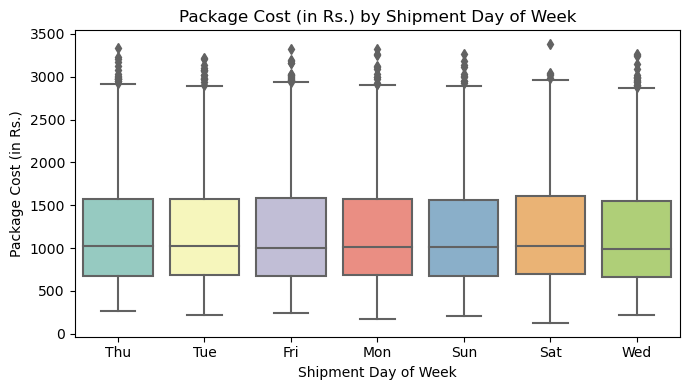

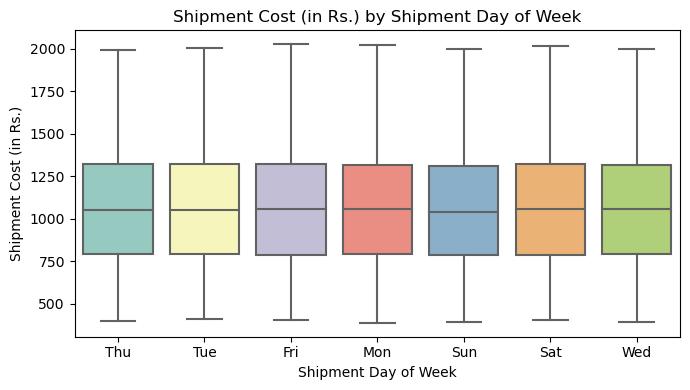

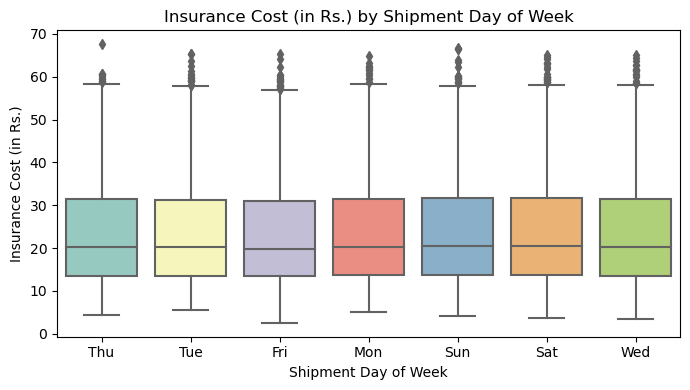

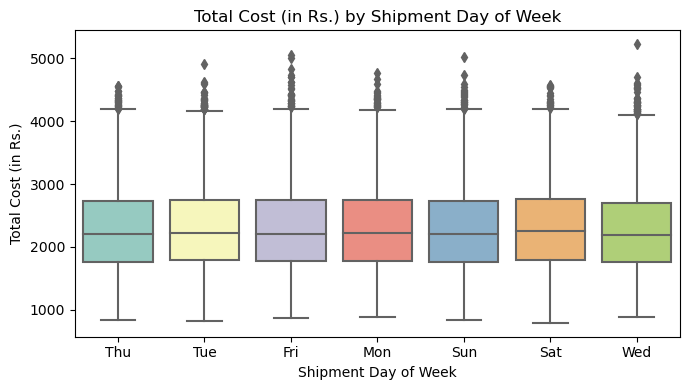

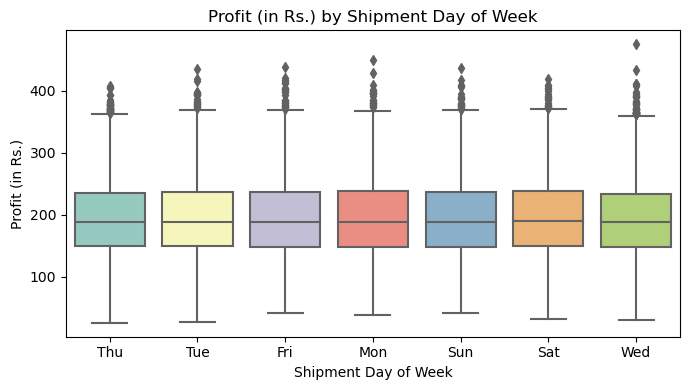

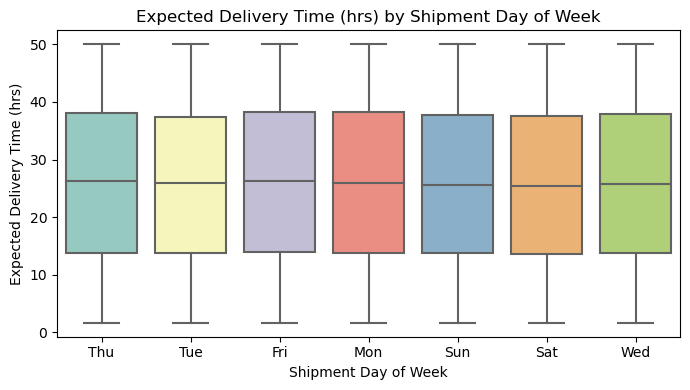

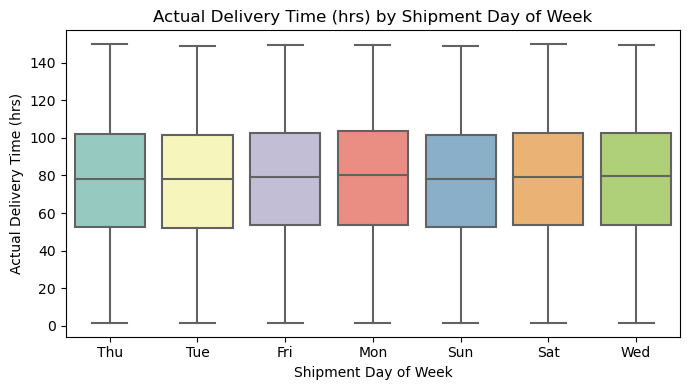

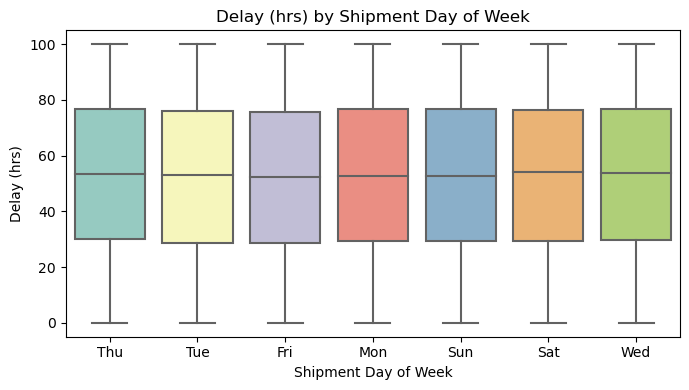

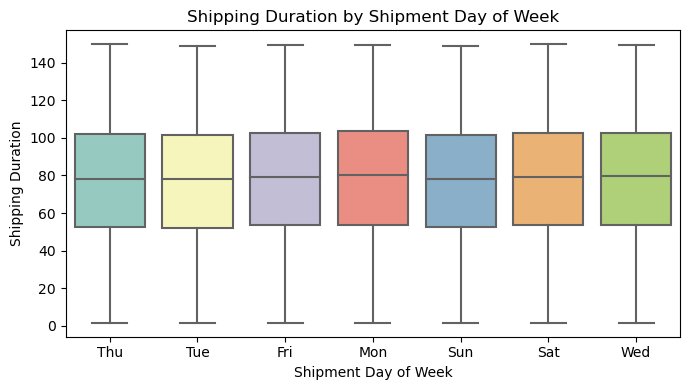

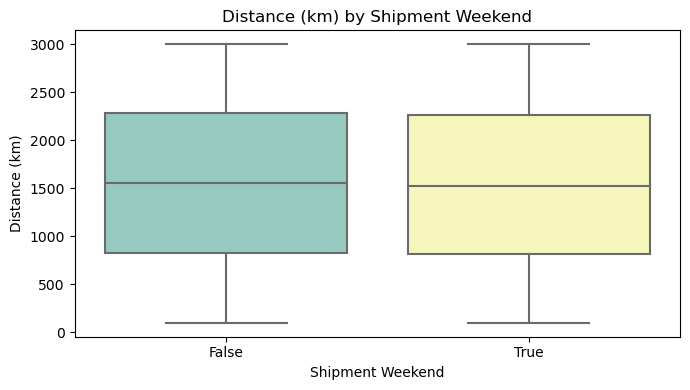

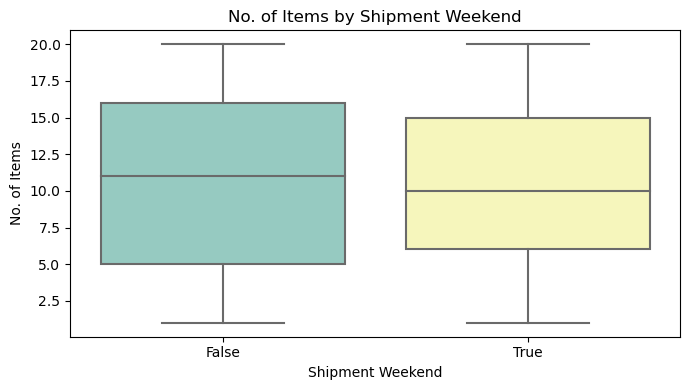

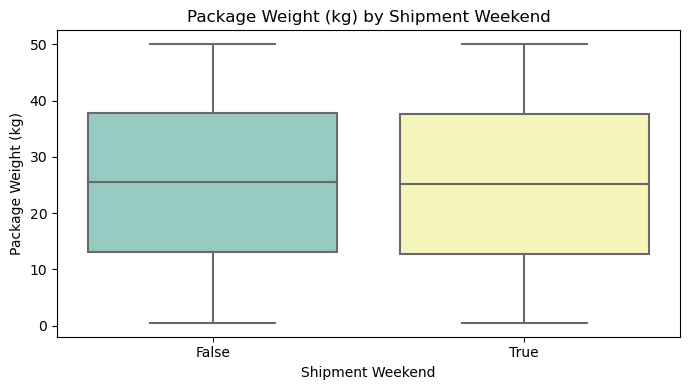

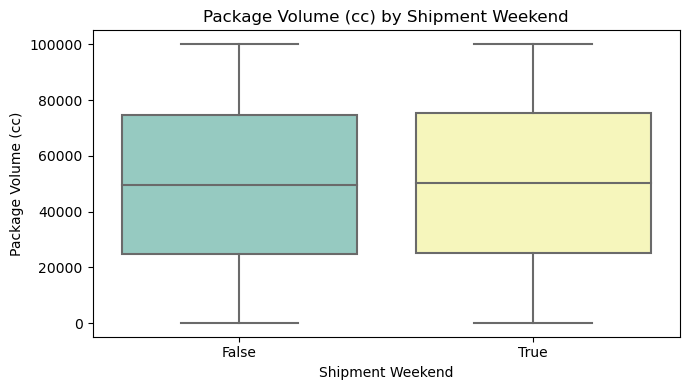

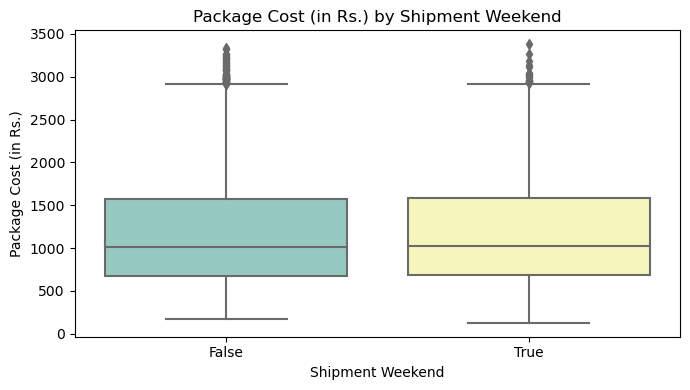

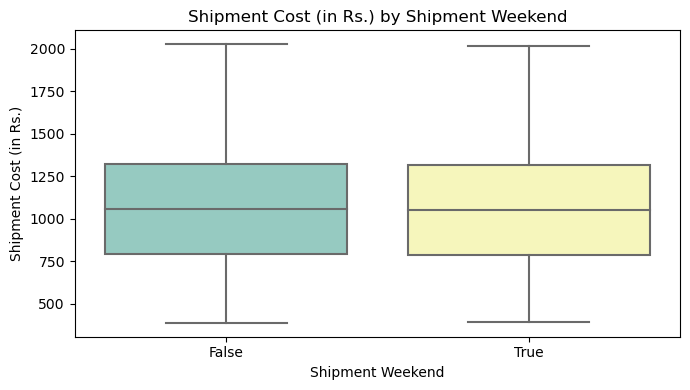

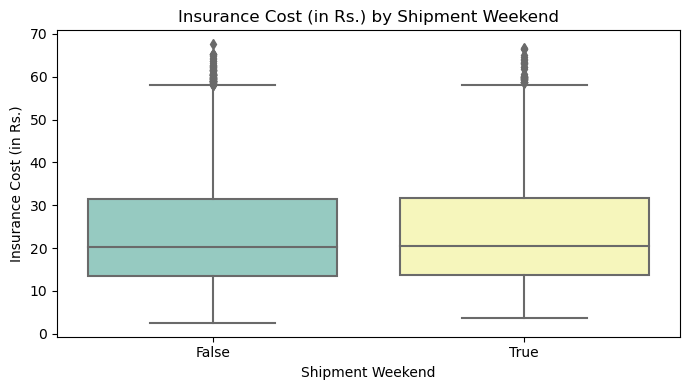

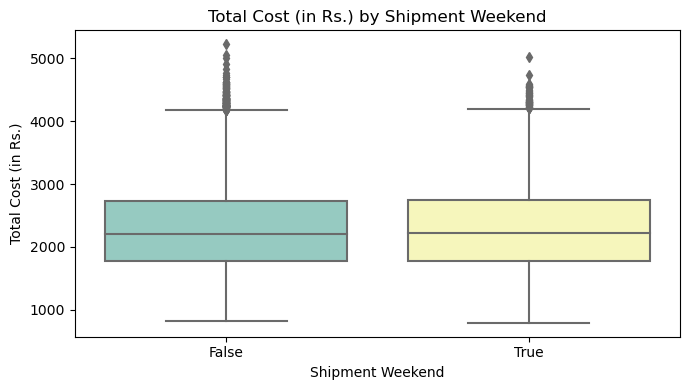

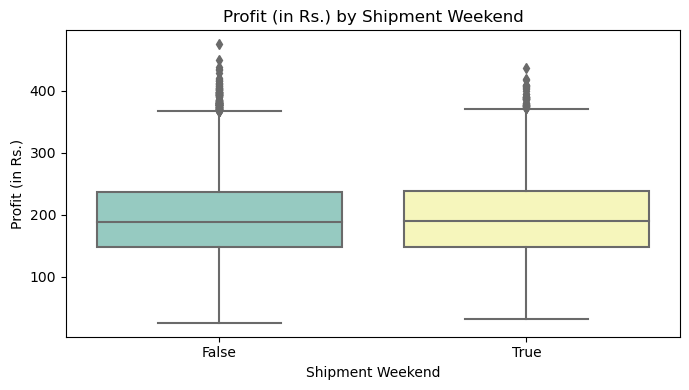

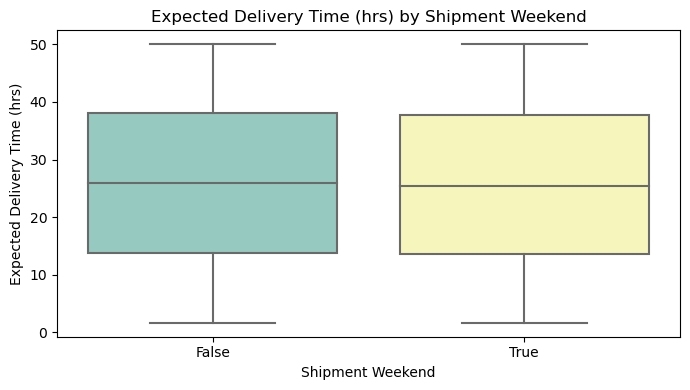

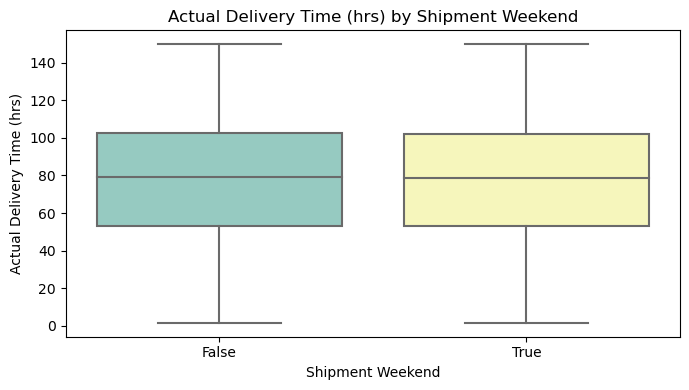

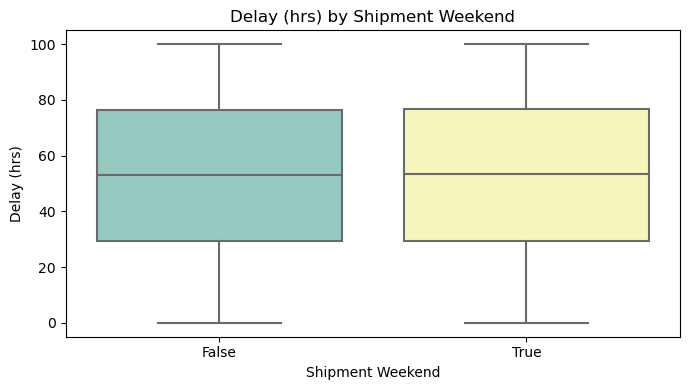

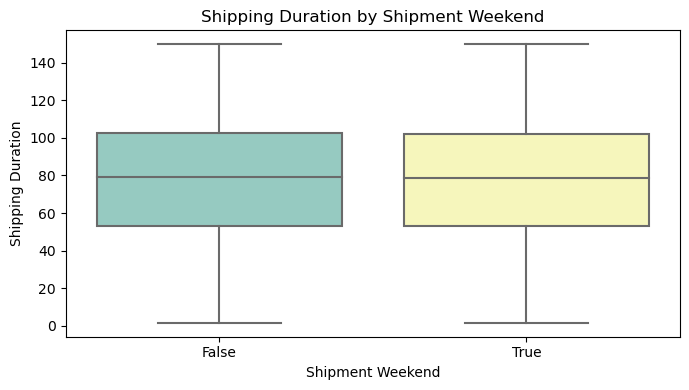

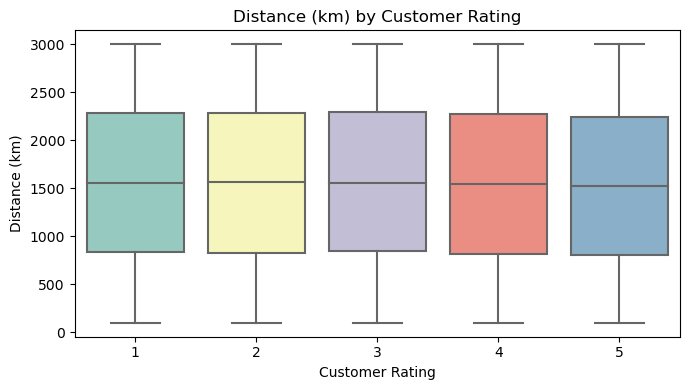

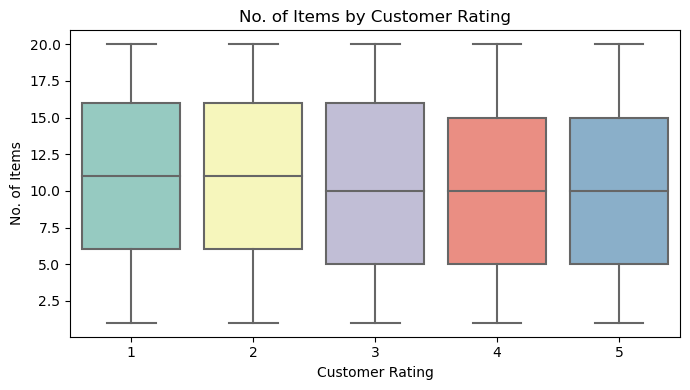

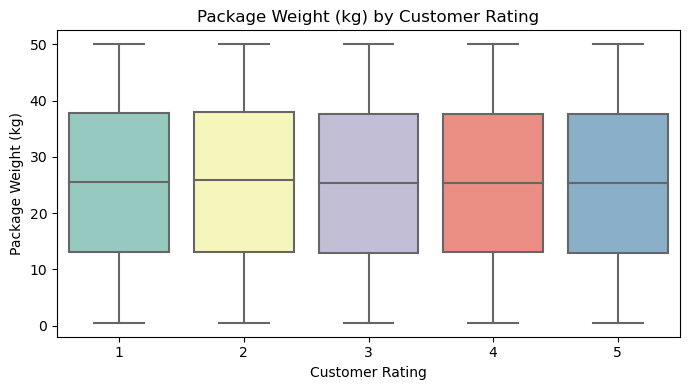

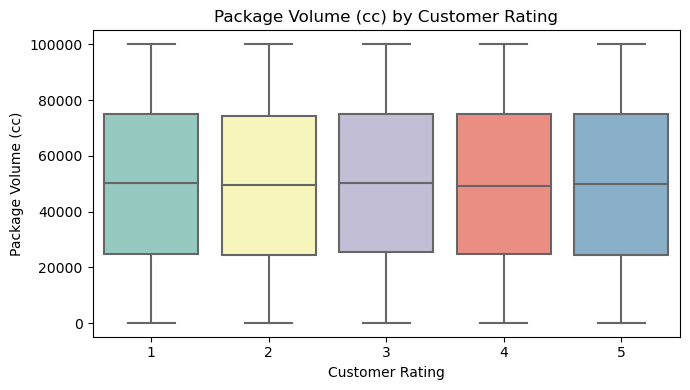

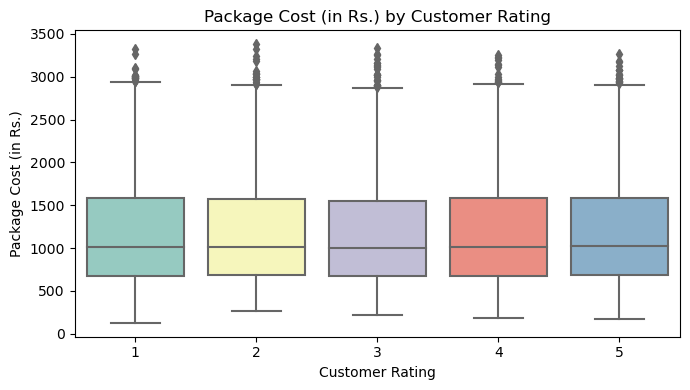

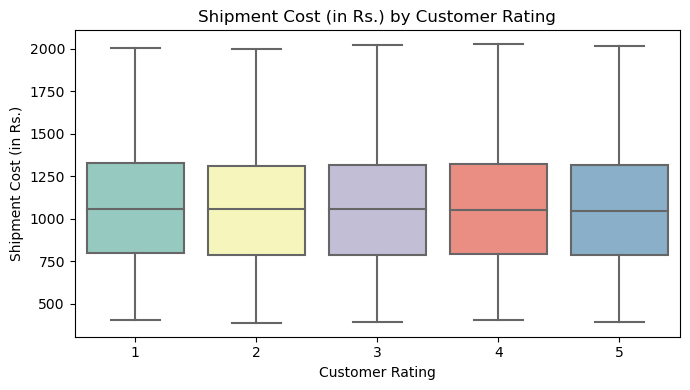

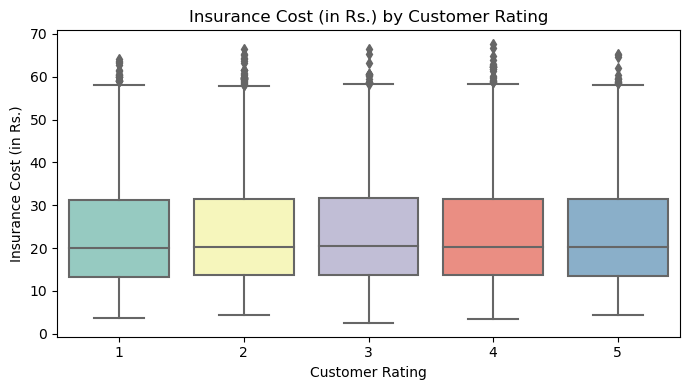

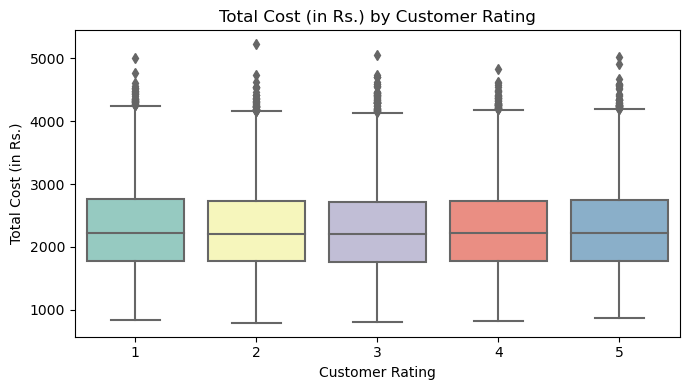

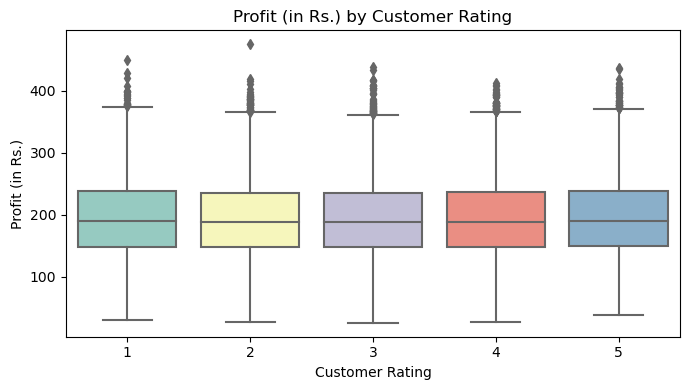

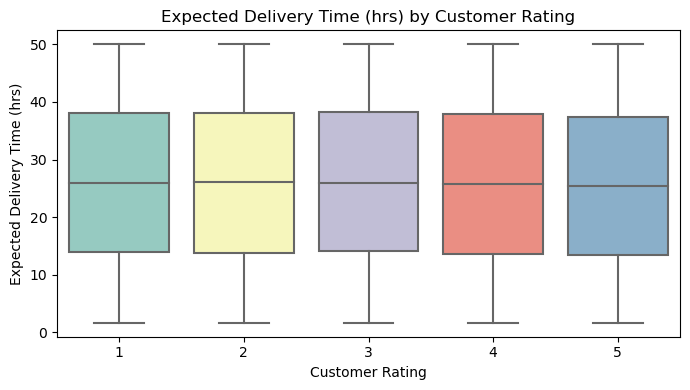

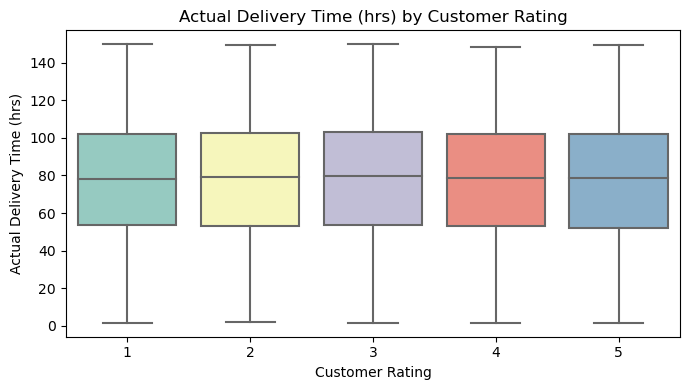

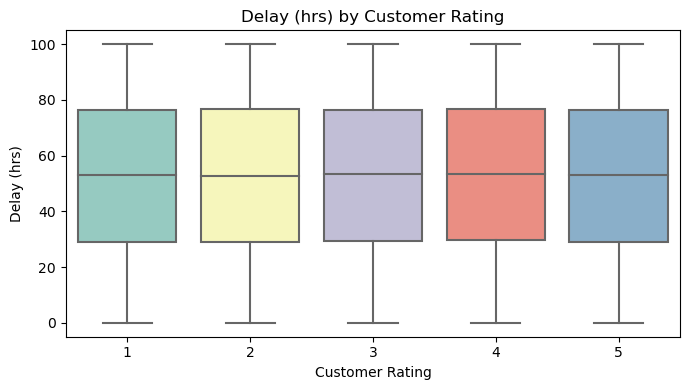

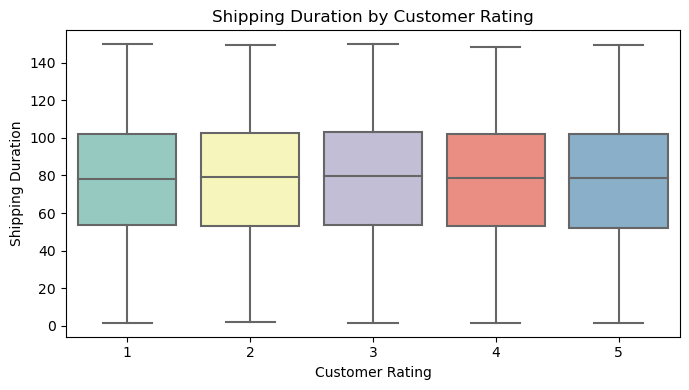

In [389]:
for cat in cat_cols:
    for num in numerical_cols:
        plt.figure(figsize=(7,4))
        sns.boxplot(data = df, x=cat, y=num, palette='Set3')
        plt.title(f'{num} by {cat}')
        plt.tight_layout()
        plt.show()

### iii) Correlation Matrix (Numeric Variables)

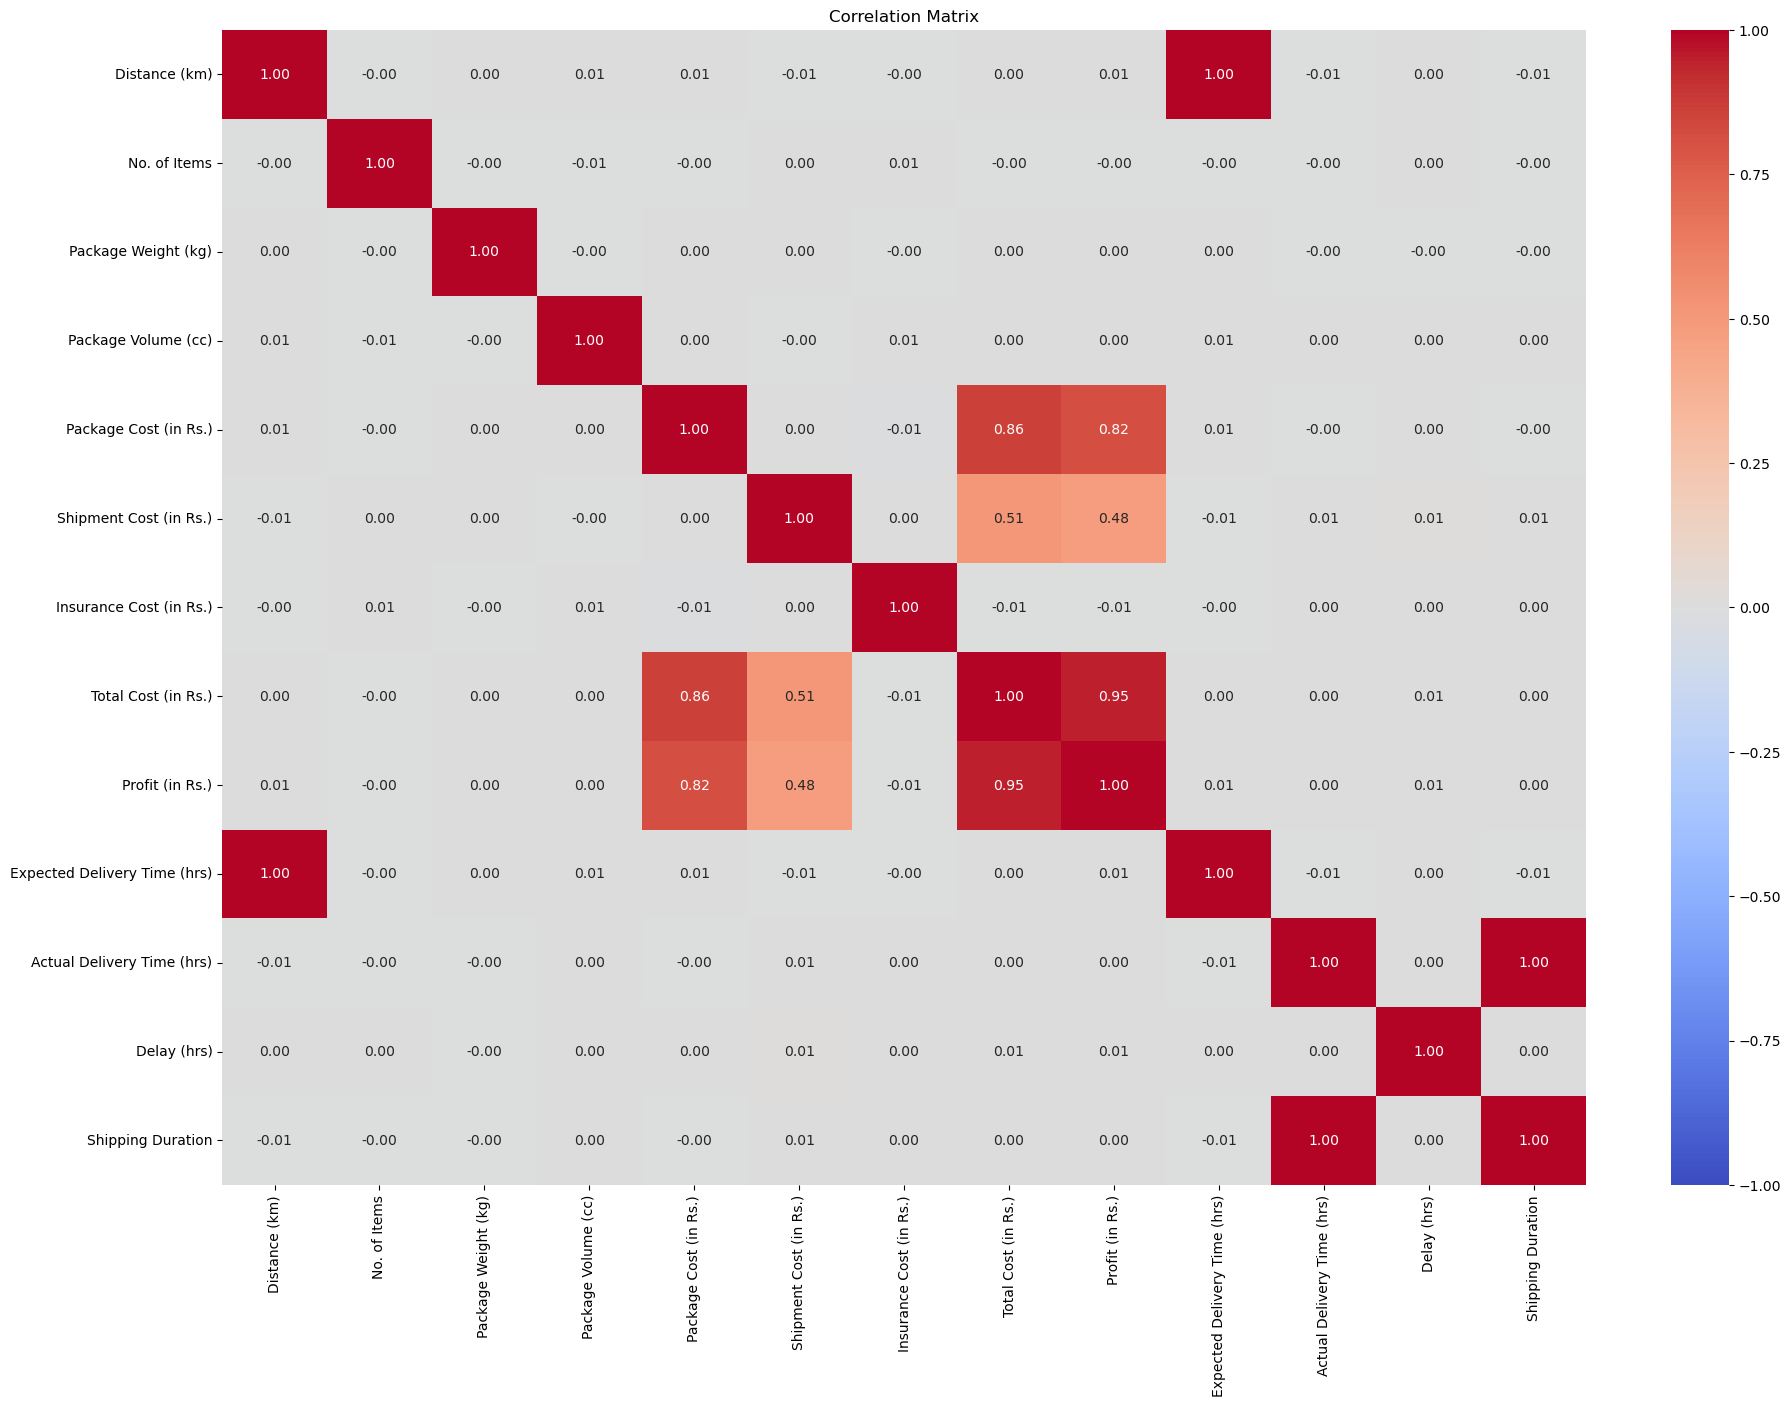

In [390]:
# Plot heatmap
plt.figure(figsize=(22, 15))
sns.heatmap(df[numerical_cols].corr(), annot=True,fmt= '0.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# 2) Feature Engineering

### A) Create New Features:

In [391]:
# Cost per km
if 'Shipment Cost (in Rs.)' in df.columns and 'Distance (km)' in df.columns:
    df['Cost per km'] = df['Shipment Cost (in Rs.)'] / df['Distance (km)']
    df['Cost per km'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['Cost per km'].fillna(0, inplace=True)
    print("Feature 'Cost per kg' created")

# Cost per kg
if 'Shipment Cost (in Rs.)' in df.columns and 'Package Weight (kg)' in df.columns:
    df['Cost per kg'] = df['Shipment Cost (in Rs.)'] / df['Package Weight (kg)']
    df['Cost per km'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df['Cost per km'].fillna(0, inplace=True)
    print("Feature 'Cost per kg' created")
    
# Delay Category (Low, Medium, High)
if 'Delay (hrs)' in df.columns:
    bins=[-float('inf'),0,24,48,float('inf')]
    labels=['No Delay', 'Low', 'Medium', 'High']  # No Delay, Low(<=1day), Medium(<=2days), High(>2 days)
    df['Delay Category'] = pd.cut(df['Delay (hrs)'], bins=bins, labels=labels, right= True)
    print("Feature 'Delay Category' created")

# Is Delayed
if 'Delay (hrs)' in df.columns:
    df['Is Delayed'] = df['Delay (hrs)'] > 0
    print("Feature 'Is Delayed' created")

# Is Fragile & High Value
if 'Fragile' in df.columns and 'Total Cost (in Rs.)' in df.columns:
    high_value_threshold = df['Total Cost (in Rs.)'].quantile(0.75)
    df['Is_Fragile & High_Value'] = ((df['Fragile'] == True) & 
                                        (df['Total Cost (in Rs.)'] > high_value_threshold))
    print(f"Feature 'Is Fragile & High Value' created (threshold: {high_value_threshold:.2f})")

Feature 'Cost per kg' created
Feature 'Cost per kg' created
Feature 'Delay Category' created
Feature 'Is Delayed' created
Feature 'Is Fragile & High Value' created (threshold: 2736.61)


### B) Outlier Treatment

In [392]:
numerical_cols

['Distance (km)',
 'No. of Items',
 'Package Weight (kg)',
 'Package Volume (cc)',
 'Package Cost (in Rs.)',
 'Shipment Cost (in Rs.)',
 'Insurance Cost (in Rs.)',
 'Total Cost (in Rs.)',
 'Profit (in Rs.)',
 'Expected Delivery Time (hrs)',
 'Actual Delivery Time (hrs)',
 'Delay (hrs)',
 'Shipping Duration']

In [393]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Apply outlier detection to key numerical columns
outlier_columns = ['Distance (km)', 'Shipment Cost (in Rs.)','Package Cost (in Rs.)',
                  'Total Cost (in Rs.)', 'Profit (in Rs.)', 'Delay (hrs)']
for col in outlier_columns:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\nOutliers detected in {col}: {len(outliers)} rows")
    print(f"Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")


Outliers detected in Distance (km): 0 rows
Lower bound: -1345.71, Upper bound: 4446.78

Outliers detected in Shipment Cost (in Rs.): 0 rows
Lower bound: -4.38, Upper bound: 2113.15

Outliers detected in Package Cost (in Rs.): 93 rows
Lower bound: -663.51, Upper bound: 2915.61

Outliers detected in Total Cost (in Rs.): 208 rows
Lower bound: 323.95, Upper bound: 4184.20

Outliers detected in Profit (in Rs.): 188 rows
Lower bound: 16.81, Upper bound: 368.67

Outliers detected in Delay (hrs): 0 rows
Lower bound: -41.52, Upper bound: 147.33


## C) Encoding & Scaling: 

### 1. One-Hot Encode Categorical Fields

In [394]:
# One-hot encode categorical variables

categorical_cols = ['Company Name', 'Shipment Mode', 'Shipment Priority','Status']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

### 2. Standardize Numeric Fields

In [395]:
# Standardize numerical columns for ML

from sklearn.preprocessing import StandardScaler

numerical_for_scaling = ['Shipment Cost (in Rs.)', 'Package Cost (in Rs.)', 'Insurance Cost (in Rs.)',
                        'Profit (in Rs.)','Distance (km)', 'Package Weight (kg)']
# Create a copy of the data for scaling
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_encoded[numerical_for_scaling])

# 3. Business Analysis 

### 1) Which company is most cost-efficient per km? 

Company Name
FedEx        1.126460
Delhivery    1.130292
BlueDart     1.133732
DHL          1.136830
UPS          1.154645
Name: Cost per km, dtype: float64


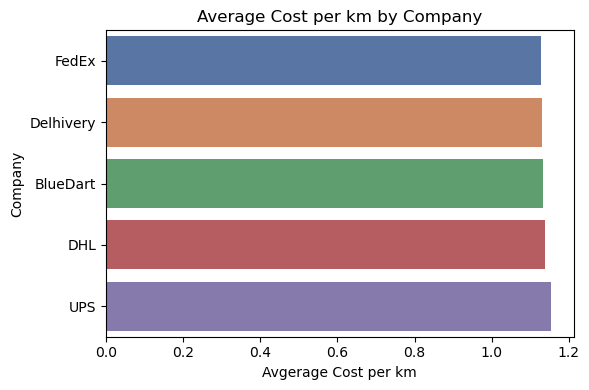

In [532]:
company_efficiency = df.groupby('Company Name')['Cost per km'].mean().sort_values()
print(company_efficiency)

# plot
plt.figure(figsize=(6,4))
sns.barplot(x=company_efficiency.values, y=company_efficiency.index, palette='deep')
plt.title('Average Cost per km by Company')
plt.xlabel('Avgerage Cost per km')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

- FedEx is the most efficient per km company

### 2) Which shipment modes are most delayed?

In [442]:
mode_delay = df.groupby('Shipment Mode').agg({
                            'Delay (hrs)': ['mean', 'median', 'std', 'count'],
                            'Is Delayed': 'mean'})
mode_delay.columns = ['Average Delay (hrs)', 'Median Delay (hrs)',
                          'Std Dev Delay (hrs)', 'Count', 'Delay Rate']
print(mode_delay)

               Average Delay (hrs)  Median Delay (hrs)  Std Dev Delay (hrs)  \
Shipment Mode                                                                 
Air                      51.301865              53.270            29.232263   
Rail                     51.574093              52.740            29.236563   
Road                     51.666861              53.060            29.382447   
Sea                      51.856162              53.495            29.343344   

               Count  Delay Rate  
Shipment Mode                     
Air             9103    0.840948  
Rail            9149    0.835439  
Road           22406    0.832482  
Sea             4544    0.837719  


Shipment Mode
Air     84.09%
Sea     83.77%
Rail    83.54%
Road    83.25%
Name: Is Delayed, dtype: object


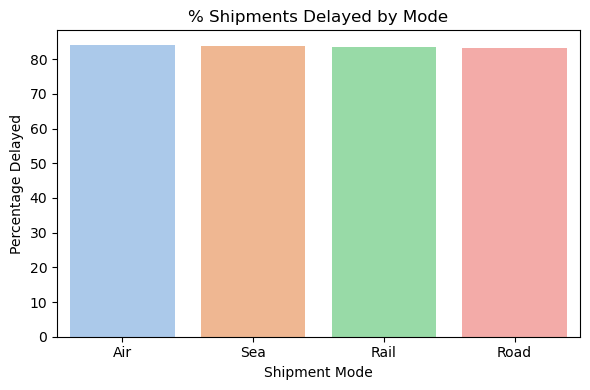

In [529]:
mode_delay = df.groupby('Shipment Mode')['Is Delayed'].mean().sort_values(ascending= False)
mode_delay_pct = mode_delay.apply(lambda x: f'{x :.2%}')
print(mode_delay_pct)

# Plot
mode_delay = mode_delay.apply(lambda x: f'{x*100 : 0.2f}').astype('float')
plt.figure(figsize=(6, 4))
sns.barplot(x=mode_delay.index, y=mode_delay.values, palette='pastel')
plt.title('% Shipments Delayed by Mode')
plt.ylabel('Percentage Delayed')
plt.xlabel('Shipment Mode')
plt.tight_layout()
plt.show()

- Air, Sea mode shipments are most Delayed

### 3) Which regions have the highest logistic costs? 

                 Average Cost  Total Cost  Number of Shipments
Source Location                                               
Ahmedabad         1080.044596  4831039.48                 4473
Hyderabad         1078.246716  4816528.08                 4467
Pune              1077.617666  4940877.00                 4585
Bangalore         1075.436388  4933026.71                 4587
Mumbai            1074.339782  4790481.09                 4459
Jaipur            1073.450658  4760753.67                 4435
Chennai           1072.391454  4925493.95                 4593
Lucknow           1071.884701  4913519.47                 4584
Delhi             1067.794388  4708973.25                 4410
Kolkata           1063.868738  4737407.49                 4453


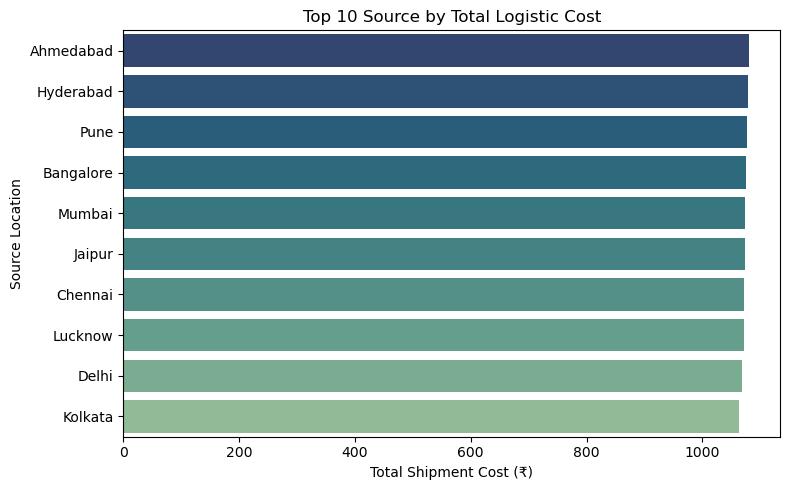

In [490]:
# Source Locations
source_costs = df.groupby('Source Location').agg({'Shipment Cost (in Rs.)': ['mean', 'sum', 'count']})
source_costs.columns = ['Average Cost', 'Total Cost', 'Number of Shipments']
source_costs = source_costs.sort_values('Average Cost', ascending=False)
print(dest_costs)

# plot
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(y=source_costs.index, x=source_costs['Average Cost'], palette='crest_r')
ax.set_title('Top 10 Source by Total Logistic Cost')
ax.set_xlabel('Total Shipment Cost (₹)')
ax.set_ylabel('Source Location')
plt.tight_layout()
plt.show()

                      Average Cost  Total Cost  Number of Shipments
Destination Location                                               
Hyderabad              1081.077616  4734038.88                 4379
Delhi                  1079.166990  4818480.61                 4465
Mumbai                 1078.452732  4934999.70                 4576
Ahmedabad              1078.203428  4997472.89                 4635
Kolkata                1074.714539  4693278.39                 4367
Chennai                1071.209321  4920064.41                 4593
Bangalore              1070.546248  4844221.77                 4525
Lucknow                1069.042359  4808552.53                 4498
Pune                   1068.591288  4879187.82                 4566
Jaipur                 1064.341105  4727803.19                 4442


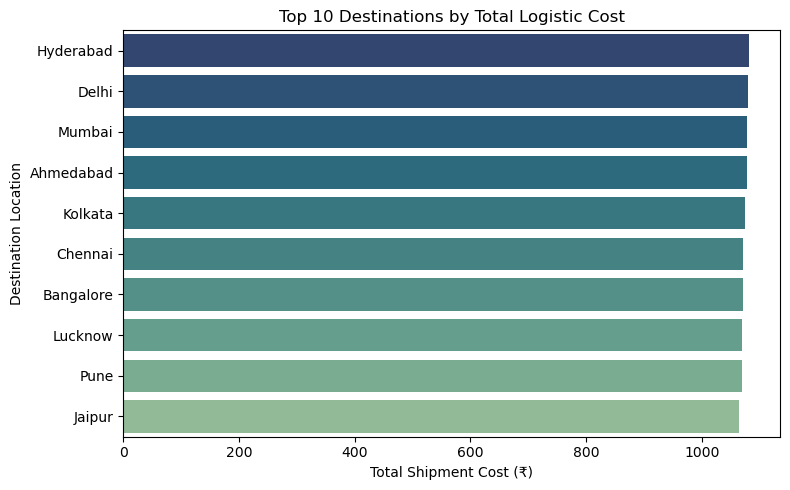

In [488]:
# Destination Locations
dest_costs = df.groupby('Destination Location').agg({'Shipment Cost (in Rs.)': ['mean', 'sum', 'count']})
dest_costs.columns = ['Average Cost', 'Total Cost', 'Number of Shipments']
dest_costs = dest_costs.sort_values('Average Cost', ascending=False)
print(dest_costs)

# plot
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(y=dest_costs.index, x=dest_costs['Average Cost'], palette='crest_r')
ax.set_title('Top 10 Destinations by Total Logistic Cost')
ax.set_xlabel('Total Shipment Cost (₹)')
ax.set_ylabel('Destination Location')
plt.tight_layout()
plt.show()

- Hyderabad, Delhi, Mumbai regions have highest logistic costs 

### 4) Product Categories with Most Returns & Delays

             Total Delays
Category                 
Apparel              8450
Electronics          8444
Documents            8303
Medicines            8296
Furniture            8272


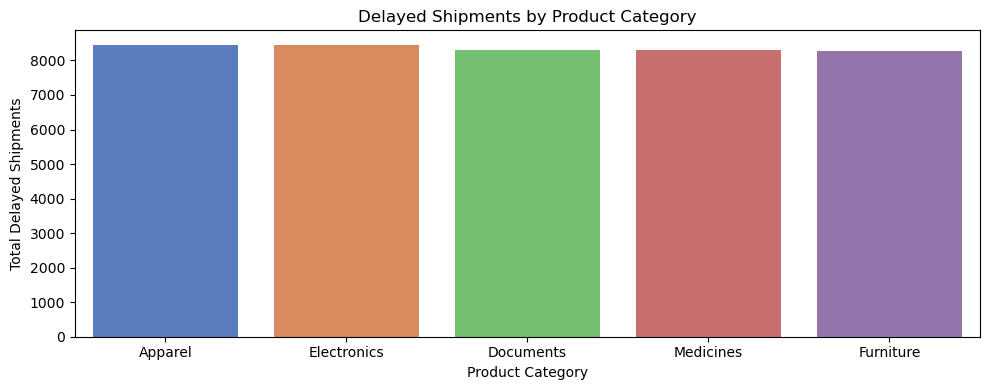

In [528]:
# Delayed shipments per category
category_delays = df.groupby('Category').agg({'Is Delayed':'sum'}).rename(columns={'Is Delayed': 'Total Delays'})
category_delays = category_delays.sort_values('Total Delays', ascending=False)
print(category_delays)

# Plot delays
plt.figure(figsize=(10, 4))
sns.barplot(x=category_delays.index, y=category_delays['Total Delays'], palette='muted')
plt.title('Delayed Shipments by Product Category')
plt.ylabel('Total Delayed Shipments')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

- Apparel category has most delays

Category
Electronics    2554
Apparel        2535
Furniture      2457
Medicines      2457
Documents      2437
dtype: int64


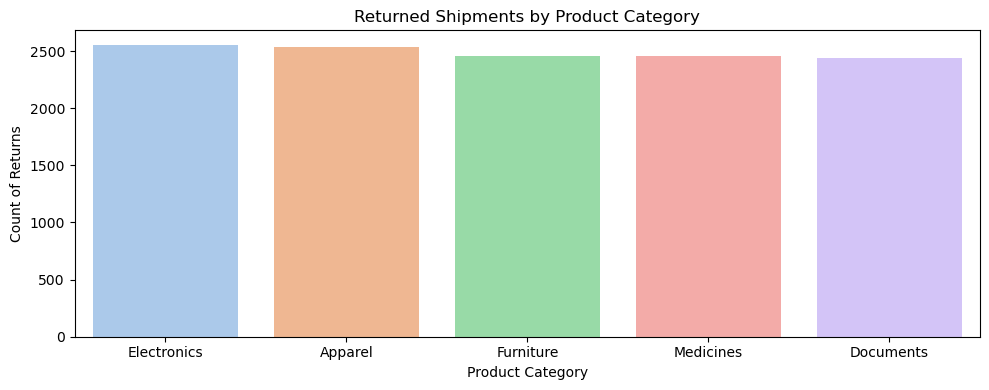

In [550]:
# Returned shipments per category
category_returns = df[df['Status'] == 'Returned'].groupby('Category').size().sort_values(ascending=False)
print(category_returns)

# Plot returns
plt.figure(figsize=(10, 4))
sns.barplot(x=category_returns.index, y=category_returns.values, palette='pastel')
plt.title('Returned Shipments by Product Category')
plt.ylabel('Count of Returns')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

- Electronics category has most returns

## 1) Descriptive Analytics (What happened?) 

In [551]:
df.head()

Shipment ID Company Name Source Location Destination Location  \
0   SHP100000          DHL          Mumbai                Delhi   
1   SHP100001     BlueDart          Jaipur            Ahmedabad   
2   SHP100002    Delhivery         Kolkata              Chennai   
3   SHP100003          UPS       Hyderabad               Mumbai   
4   SHP100004        FedEx            Pune            Ahmedabad   

   Source Latitude  Source Longitude  Destination Latitude  \
0          19.0760           72.8777               28.6139   
1          26.9124           75.7873               23.0225   
2          22.5726           88.3639               13.0827   
3          17.3850           78.4867               19.0760   
4          18.5204           73.8567               23.0225   

   Destination Longitude  Distance (km)     Category  No. of Items  \
0                77.2090        1186.17      Apparel             9   
1                72.5714         159.70  Electronics             8   
2                80.2707        1259.60    Documents             2   
3                72.8777        2072.89    Medicines            13   
4                72.5714         199.73    Medicines             9   

   Package Weight (kg)  Package Volume (cc)  Package Cost (in Rs.)  \
0                47.56             73226.19                 769.64   
1                48.51             83261.02                1063.80   
2                 2.81             97378.18                 617.30   
3                22.80              1425.17                2229.19   
4                45.51             25952.12                2335.65   

   Shipment Cost (in Rs.)  Insurance Cost (in Rs.)  Total Cost (in Rs.)  \
0                 1010.70                    22.43          1824.048611   
1                 1275.44                    38.77          2434.804288   
2                 1334.16                     9.64          2027.339455   
3                 1849.40                    17.60          4142.469264   
4                  868.10                    26.10          3227.791678   

   Profit (in Rs.) Shipment Priority Shipment Mode  Fragile  Customer Rating  \
0       133.460273           Express           Air     True                5   
1       210.953966            Normal           Air     True                4   
2       176.243832            Normal          Road     True                2   
3       376.899364           Express          Road     True                5   
4       268.563228            Normal          Road    False                2   

   Expected Delivery Time (hrs)  Actual Delivery Time (hrs)  Delay (hrs)  \
0                         19.77                       55.67        92.96   
1                          2.66                      142.45        47.48   
2                         20.99                         NaN        66.26   
3                         34.55                       49.20        87.76   
4                          3.33                       99.39        85.70   

  Date of Shipment      Status Payment Method Shipment Month  Shipment Day  \
0       2023-05-11   Delivered        Prepaid            May            11   
1       2023-02-28   Delivered            COD            Feb            28   
2       2023-11-03    Returned        Prepaid            Nov             3   
3       2023-09-21  In-Transit        Prepaid            Sep            21   
4       2023-02-13     Delayed            COD            Feb            13   

  Shipment Day of Week  Shipment Weekend  Shipping Duration  Cost per km  \
0                  Thu             False              55.67     0.852070   
1                  Tue             False             142.45     7.986475   
2                  Fri             False                NaN     1.059193   
3                  Thu             False              49.20     0.892184   
4                  Mon             False              99.39     4.346368   

   Cost per kg Delay Category  Is Delayed  Is_Fragile & High_Value  


#### Q1) What is the average shipment cost by company and mode?

   Company Name Shipment Mode  Shipment Cost (in Rs.)
5           DHL          Rail             1088.497683
1      BlueDart          Rail             1085.610169
19          UPS           Sea             1081.619762
17          UPS          Rail             1081.299175
10    Delhivery          Road             1076.727163
12        FedEx           Air             1074.793674
2      BlueDart          Road             1074.538162
14        FedEx          Road             1073.013453
16          UPS           Air             1071.920283
3      BlueDart           Sea             1071.763460
18          UPS          Road             1070.988403
13        FedEx          Rail             1070.975673
7           DHL           Sea             1070.950810
4           DHL           Air             1070.685818
11    Delhivery           Sea             1070.404420
0      BlueDart           Air             1070.322874
6           DHL          Road             1070.001356
15        FedEx           Se

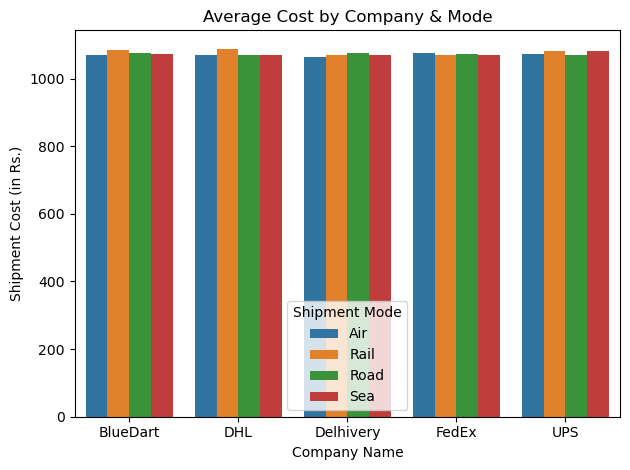

In [564]:
avg_cost = df.groupby(['Company Name', 'Shipment Mode'])['Shipment Cost (in Rs.)'].mean().reset_index()
print(avg_cost.sort_values('Shipment Cost (in Rs.)', ascending=False))

# Visualization
sns.barplot(data=avg_cost, x='Company Name', y='Shipment Cost (in Rs.)', hue='Shipment Mode')
plt.title('Average Cost by Company & Mode')
plt.tight_layout()
plt.show()

#### Q2) What are the top 5 most common shipment routes?


Top 5 Most Common Routes:
Route
Pune -> Chennai         611
Pune -> Bangalore       605
Mumbai -> Chennai       603
Lucknow -> Ahmedabad    601
Lucknow -> Pune         599
Name: count, dtype: int64


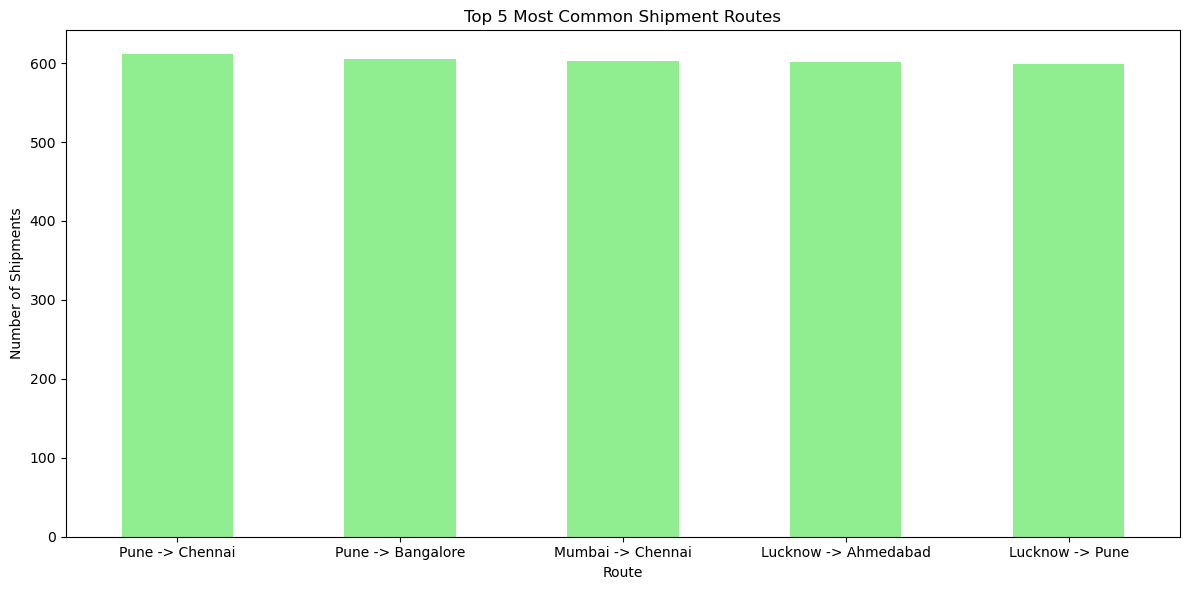

In [588]:
# Route identifier
df['Route'] = df['Source Location'] + ' -> ' + df['Destination Location']

top_routes = df['Route'].value_counts().head(5)
print("\nTop 5 Most Common Routes:")
print(top_routes)

# Visualization
plt.figure(figsize=(12, 6))
top_routes.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Most Common Shipment Routes')
plt.xlabel('Route')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [578]:
# Map visualization (coordinates exist)
import folium
m = folium.Map(location=[df['Source Latitude'].mean(), df['Source Longitude'].mean()])
for _, row in df.iterrows():
    folium.PolyLine(
        locations=[[row['Source Latitude'], row['Source Longitude']], 
                   [row['Destination Latitude'], row['Destination Longitude']]],
        color='blue'
    ).add_to(m)
m.save('routes.html')

#### Q3) What is the distribution of delays across all companies?

              count       mean  median        std
Company Name                                     
Delhivery      8987  51.258117  52.550  29.261922
UPS            9066  51.275045  52.335  29.389731
BlueDart       6707  51.678008  53.090  29.264887
DHL            9094  51.762141  53.720  29.310620
FedEx         11348  51.928866  53.500  29.343396


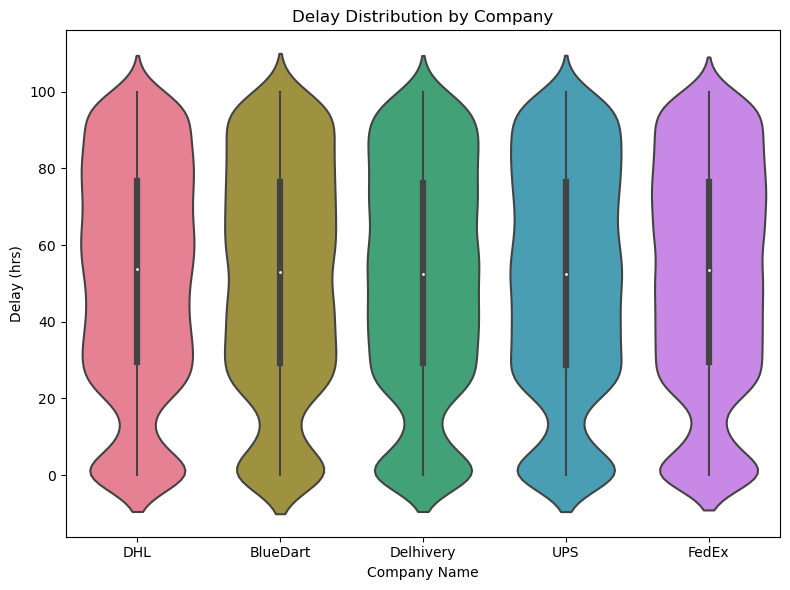

In [598]:
# Statistical summary
delay_stats = df.groupby('Company Name')['Delay (hrs)'].agg(['count','mean', 'median', 'std'])
print(delay_stats.sort_values('mean'))

plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='Company Name', y='Delay (hrs)' , palette ='husl')
plt.title('Delay Distribution by Company')
plt.tight_layout()
plt.show()

#### iv) How many shipments were returned or delayed in each month? 

         Delayed  Returned
Month                     
2023-01     4264      1068
2023-02     3775       928
2023-03     4307      1068
2023-04     4108       991
2023-05     4134      1026
2023-06     4197      1082
2023-07     4139      1039
2023-08     4404      1036
2023-09     4122       982
2023-10     4267      1041
2023-11     4022      1073
2023-12     4261      1106


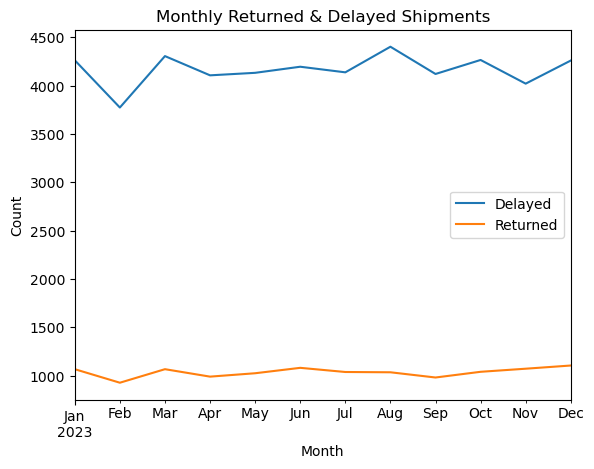

In [644]:
df['Month'] = df['Date of Shipment'].dt.to_period('M')

monthly_issues = df.groupby('Month').agg(
                                Delayed=('Delay (hrs)', lambda x: (x > 0).count()),
                                Returned=('Status', lambda x: (x == 'Returned').sum()))
print(monthly_issues)


# Line plot
monthly_issues.plot(kind='line')
plt.title('Monthly Returned & Delayed Shipments')
plt.ylabel('Count')
plt.show()